<a href="https://colab.research.google.com/github/rizkiatthoriq/geographic-data-science/blob/main/Fishery%20Smart%20Mapping%3A%20Location%20Intelligence%20to%20Optimize%20West%20Java's%20Sustainable%20Fisheries%20Economy/Fishery_Modeling_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fishery Smart Mapping: A Structured Approach to Modeling Fishing Potential 🎣

**Project:** Fishery Smart Mapping: Location Intelligence to Optimize West Java's Sustainable Fisheries Economy

**Links:**
- [Full Manuscript (Id)](https://docs.google.com/document/d/109isML6r1oMWTyDVpA1lzvFB41inRQS9AddyGapZXms/edit?usp=sharing) 
- [Preentation (Id)](https://docs.google.com/presentation/d/16oA1zXrUypx_a2_Akrje1Vqrvd3hvfvgw3y2P0Q2eoU/edit?usp=sharing) (In Bahasa Indonesia)
- [presentation (En)](https://docs.google.com/presentation/d/1F5CoGvVAhqX_BpJzL32AyJUF6t71jZ9AJ-1Y47vSwwk/edit?usp=sharing) (In English).

---

### Notebook Overview
This notebook presents a comprehensive workflow for modeling fishing potential in the waters of West Java. We conduct five distinct experiments to identify the most effective approach for predicting high-potential fishing zones.

The experiments explore different strategies, including:
1.  **Baseline Modeling:** Using all available oceanographic variables.
2.  **Feature Reduction:** Selecting variables to reduce multicollinearity.
3.  **Weighted Averaging:** A simple ensemble method.
4.  **Feature Engineering:** Creating new, more powerful features from existing data. **(This experiment forms the basis for our final analysis).**
5.  **Stacking Ensemble:** A more advanced ensemble technique.

The final goal is to generate a predictive map that highlights areas with a high probability of being productive fishing grounds, contributing to a more sustainable and efficient fisheries economy.

### Variables Used in Modeling
| Variable | Description | Unit / Type |
| :--- | :--- | :--- |
| **`sst`** | Sea Surface Temperature. A crucial factor influencing metabolic rates and species distribution. | Degrees Celsius (°C) |
| **`chlo_a`** | Chlorophyll-a concentration. A common proxy for phytoplankton abundance, representing the base of the marine food web. | Milligrams per cubic meter (mg/m³) |
| **`reef_dist`** | The shortest distance from a data point to the nearest known coral reef, which are critical fish habitats. | Meters (m) |
| **`sal_0`** | Sea surface salinity at 0 meters depth. Affects water density and ocean currents. | Practical Salinity Unit (PSU) |
| **`sft`** | Sea Surface Height (or Topography). Represents variations in sea level, indicating eddies and currents. | Meters (m) |
| **`scv_u0`** | East-West (Zonal) sea current velocity at the surface (0m depth). Positive values indicate eastward flow. | Meters per second (m/s) |
| **`scv_v0`** | North-South (Meridional) sea current velocity at the surface (0m depth). Positive values indicate northward flow. | Meters per second (m/s) |
| **`scv_u100`**| East-West (Zonal) sea current velocity at 100m depth. | Meters per second (m/s) |
| **`scv_v100`**| North-South (Meridional) sea current velocity at 100m depth. | Meters per second (m/s) |
| **`scv_u200`**| East-West (Zonal) sea current velocity at 200m depth. | Meters per second (m/s) |
| **`scv_v200`**| North-South (Meridional) sea current velocity at 200m depth. | Meters per second (m/s) |
| **`sse`** | Sea Surface Elevation. Similar to `sft`, representing sea level. (Note: Dropped in the final experiment). | Meters (m) |
| **`sst_chlo_a`**| An interaction term created by multiplying `sst` and `chlo_a` to capture their combined effect. | Engineered Feature |
| **`x`** | Longitude coordinate of the data point. | Degrees |
| **`y`** | Latitude coordinate of the data point. | Degrees |
| **`Label`** | **Target Variable.** Indicates the fishing potential of a location. | Categorical (0 = Low, 1 = High) |

### Table of Contents

>[Fishery Smart Mapping: A Structured Approach to Modeling Fishing Potential](#scrollTo=lU3DXe0SlJY1)

>>>[Notebook Overview](#scrollTo=lU3DXe0SlJY1)

>>>[Variables Used in Modeling](#scrollTo=lU3DXe0SlJY1)

>>[Setup and Environment](#scrollTo=O38wXqcclJY5)

>>>[1.1. Google Drive Integration](#scrollTo=Xx1psSF7lJY5)

>>>[1.2. Prepare Libraries](#scrollTo=U9SapoUmlJY7)

>>[Data Loading and Initial Inspection](#scrollTo=BSVAnUI3lJY8)

>>[Exploratory Data Analysis (EDA)](#scrollTo=o6hEDxevlJY-)

>>>[3.1. Data Distribution](#scrollTo=rfzffjQWlJY-)

>>>[3.2. Correlation Matrix](#scrollTo=KI878dsnlJY_)

>>>[3.3. Outlier Detection with Boxplots](#scrollTo=yd6gExpQlJY_)

>>>[3.4. Handle The Outliers](#scrollTo=EOHO3F89lJY_)

>>[Modeling Preparation](#scrollTo=r8y63OR5lJZA)

>>>[4.1. Universal Model Evaluation Function](#scrollTo=ia3FK-oNlJZB)

>>>[4.2. Model Definitions](#scrollTo=zjaXfXEtlJZB)

>>[Modeling Experiments](#scrollTo=jPLlGrMhlJZC)

>>>[5.1. Experiment 1: Baseline Model (All Features)](#scrollTo=mYLWFzl-lJZC)

>>>>[5.1.1. Data Preparation](#scrollTo=JIh4cW63lJZC)

>>>>[5.1.2. Model Evaluation](#scrollTo=XhD9JONSlJZC)

>>>>[5.1.3. Prediction and Spatialization](#scrollTo=bHiW88qilJZC)

>>>>[5.1.4. Visualization of Results](#scrollTo=LuO2hm1ElJZD)

>>>[5.2. Experiment 2: Modeling with Reduced Features](#scrollTo=zuakkV86lJZJ)

>>>>[5.2.1. Data Preparation](#scrollTo=E7BMZ-aalJZJ)

>>>>[5.2.2. Model Evaluation](#scrollTo=jF6D8vtllJZK)

>>>>[5.2.3. Prediction and Spatialization](#scrollTo=exn77c4olJZK)

>>>>[5.2.4. Visualization of Results](#scrollTo=rWRiiWvklJZL)

>>>[5.3. Experiment 3: Weighted Averaging Ensemble](#scrollTo=GKTQwh2flJZL)

>>>>[5.3.1. Implementation and Evaluation](#scrollTo=Pb904K3XlJZL)

>>>>[5.3.2. Prediction and Spatialization](#scrollTo=PBZXsddmlJZM)

>>>>[5.3.3. Visualization of Results](#scrollTo=hPIztb5ZlJZM)

>>>[5.4. Experiment 4: Reducing Variables and Feature Engineering (Key Experiment)](#scrollTo=hNcY0zpDkwPn)

>>>>[5.4.1. Feature Engineering and Data Preparation](#scrollTo=4f7T2mX-lJZN)

>>>>[5.4.2. Model Evaluation](#scrollTo=TWkk5feDlJZN)

>>>>[5.4.3. Prediction and Spatialization](#scrollTo=bjPp91LslJZO)

>>>>[5.4.4. Visualization of Results](#scrollTo=KHw3Rl4ulJZO)

>>>[5.5. Experiment 5: Simple Stacking Ensemble](#scrollTo=d0T9To3dlJZO)

>>>>[5.5.1. Implementation and Evaluation](#scrollTo=OBKJRKkklJZP)

>>>>[5.5.2. Prediction and Spatialization](#scrollTo=8UlSCnWmlJZP)

>>>>[5.5.3. Visualization of Results](#scrollTo=tB0cWkkklJZP)

>>[Conclusion](#scrollTo=l63uNkMVlJZQ)



## 1. Setup and Environment

### 1.1. Google Drive Integration

First, we mount Google Drive to access our datasets directly within the Colab environment. We then set the working directory to where our data is stored.

In [2]:
import os
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

loc = '/content/drive/MyDrive/Datathon Jabar Georestart 2024/Data/ML Input/'
# create a path if it doesn't exist
if not os.path.exists(loc):
    os.makedirs(loc)
os.chdir(loc)
print('Working Directory: ',os.getcwd())

Mounted at /content/drive
Working Directory:  /content/drive/MyDrive/Datathon Jabar Georestart 2024/Data/ML Input


### 1.2. Prepare Libraries

We import all necessary libraries for the analysis. They are grouped by functionality for clarity: data manipulation, visualization, machine learning, and geospatial data handling.

In [4]:
# Data Manipulation
import pandas as pd
import numpy as np
from scipy.stats import skew, randint, boxcox
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Machine Learning Models (Classification)
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

# Evaluation Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.model_selection import learning_curve

# Geospatial Data Handling
import geopandas as gpd
!pip install rasterio rioxarray
import rasterio
import rioxarray
from rasterio.plot import show

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 kB 2.5 MB/s eta 0:00:00


## 2. Data Loading and Initial Inspection

We load two datasets:
- `sample.csv`: Contains labeled data points (high/low potential) used for training and testing our models.
- `variable.csv`: Contains the full grid of data points covering the entire study area, which we will use for prediction to generate our final map.

In [5]:
sample = pd.read_csv('sample.csv')
variable = pd.read_csv('variable.csv')

print(f'sample size: {sample.shape[0]}')
print(f'total points: {variable.shape[0]}')

print("\nSample Data Head:")
display(sample.head())

print("\nVariable Data Head:")
display(variable.head())

sample size: 4730
total points: 177286

Sample Data Head:


Label        sst    chlo_a     reef_dist         sal_0   sal_100  sal_200  \
0      0  29.248841  0.312147  61673.620191  12862.789887  525.0610      0.0   
1      0  29.358681  0.351898  43346.192418  12671.255489    0.0000      0.0   
2      0  29.334430  0.313653  44211.378885  12560.390154    0.0000      0.0   
3      0  29.848909  2.092630  18837.369164  10842.940740    0.0000      0.0   
4      0  29.288901  0.332242  44200.107467  12800.840398   45.1028      0.0   

         sft         sse  scv_v200     scv_v0  scv_v100  scv_u200     scv_u0  \
0 -48.123563  619.690936       0.0  23.375983  0.263030       0.0  -0.721000   
1 -26.285714  622.744017       0.0  21.943038  0.000000       0.0 -32.865461   
2 -43.641723  623.793087       0.0  43.278011  0.000000       0.0 -32.746550   
3  -2.135246  647.983767       0.0  43.189462  0.000000       0.0 -46.886392   
4 -33.929705  620.983280       0.0  15.572821 -0.004075       0.0 -14.318315   

   scv_u100  
0 -0.813053  
1  0.000000  
2  0.000000  
3  0.000000  
4 -0.050436


Variable Data Head:


sst    chlo_a    reef_dist        sal_0  sal_100  sal_200        sft  \
0  29.324585  0.380063  206512.3902  13057.07959      0.0      0.0 -45.254167   
1  29.325489  0.379820  206847.5584  13057.15877      0.0      0.0 -45.268722   
2  29.324074  0.379108  204587.2467  13056.74169      0.0      0.0 -45.272109   
3  29.323884  0.379521  204910.9811  13056.82215      0.0      0.0 -45.262411   
4  29.323773  0.379969  205239.0612  13056.90048      0.0      0.0 -45.256506   

          sse  scv_v200     scv_v0  scv_v100  scv_u200     scv_u0  scv_u100  \
0  625.390910       0.0 -49.068480       0.0       0.0  14.905773       0.0   
1  625.421256       0.0 -49.100230       0.0       0.0  14.899798       0.0   
2  625.306623       0.0 -48.946208       0.0       0.0  14.983019       0.0   
3  625.327153       0.0 -48.977830       0.0       0.0  14.975050       0.0   
4  625.350789       0.0 -49.009533       0.0       0.0  14.970227       0.0   

            x         y  
0  109.059967 -4.046910  
1  109.068950 -4.046910  
2  109.033018 -4.055894  
3  109.042001 -4.055894  
4  109.050984 -4.055894

Let's get a technical summary of our training data.

In [6]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4730 entries, 0 to 4729
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Label      4730 non-null   int64  
 1   sst        4730 non-null   float64
 2   chlo_a     4730 non-null   float64
 3   reef_dist  4730 non-null   float64
 4   sal_0      4730 non-null   float64
 5   sal_100    4730 non-null   float64
 6   sal_200    4730 non-null   float64
 7   sft        4730 non-null   float64
 8   sse        4730 non-null   float64
 9   scv_v200   4730 non-null   float64
 10  scv_v0     4730 non-null   float64
 11  scv_v100   4730 non-null   float64
 12  scv_u200   4730 non-null   float64
 13  scv_u0     4730 non-null   float64
 14  scv_u100   4730 non-null   float64
dtypes: float64(14), int64(1)
memory usage: 554.4 KB


## 3. Exploratory Data Analysis (EDA)

In this section, we explore the `sample` dataset to understand its characteristics, distributions, and relationships between variables. This is a crucial step before modeling.

### 3.1. Data Distribution

We start by plotting histograms for each variable, separated by the target `Label`. This helps us see if there are clear differences in the distributions for high-potential (1) and low-potential (0) fishing zones.

In [7]:
sample.describe()

Label          sst       chlo_a      reef_dist         sal_0  \
count  4730.000000  4730.000000  4730.000000    4730.000000   4730.000000   
mean      0.500000    28.819779     0.453807  126159.364318  13103.174001   
std       0.500053     0.722388     0.514106   76947.032525    836.568477   
min       0.000000    27.364746     0.149898     998.378632  10818.801065   
25%       0.000000    27.974243     0.233198   61463.161328  12776.883300   
50%       0.500000    29.311337     0.363378  131187.099272  12972.095669   
75%       1.000000    29.355499     0.428321  156469.372637  14023.172881   
max       1.000000    30.570490     6.340660  435692.498981  14254.796202   

            sal_100       sal_200          sft          sse     scv_v200  \
count   4730.000000   4730.000000  4730.000000  4730.000000  4730.000000   
mean    5446.943333   5374.517421 -1425.891662   570.368395     2.248558   
std     6927.443617   6948.976657  2072.689751    67.134978    11.049979   
min        0.000000      0.000000 -6907.124717   460.598895   -35.254309   
25%        0.000000      0.000000 -2863.516440   489.170750     0.000000   
50%        6.004955      0.000000   -44.405896   617.215372     0.000000   
75%    14494.700000  14555.400000   -27.380952   623.148765     0.000000   
max    14546.600000  14631.500000    -0.814208   647.983767    36.959548   

            scv_v0     scv_v100     scv_u200       scv_u0     scv_u100  
count  4730.000000  4730.000000  4730.000000  4730.000000  4730.000000  
mean      1.019713     5.415339    -9.591302   -56.623845   -28.951246  
std      37.224717    15.876603    19.284596    61.322084    41.084642  
min     -57.225554   -37.235101   -85.480060  -245.570023  -151.218431  
25%     -32.105196     0.000000   -10.434984  -101.638634   -61.232481  
50%      -2.187667     0.000000     0.000000   -37.759246    -0.004486  
75%      35.300363     4.770085     0.000000    -8.029083     0.000000  
max      77.675094    54.591225    14.906501    34.312450     0.000000

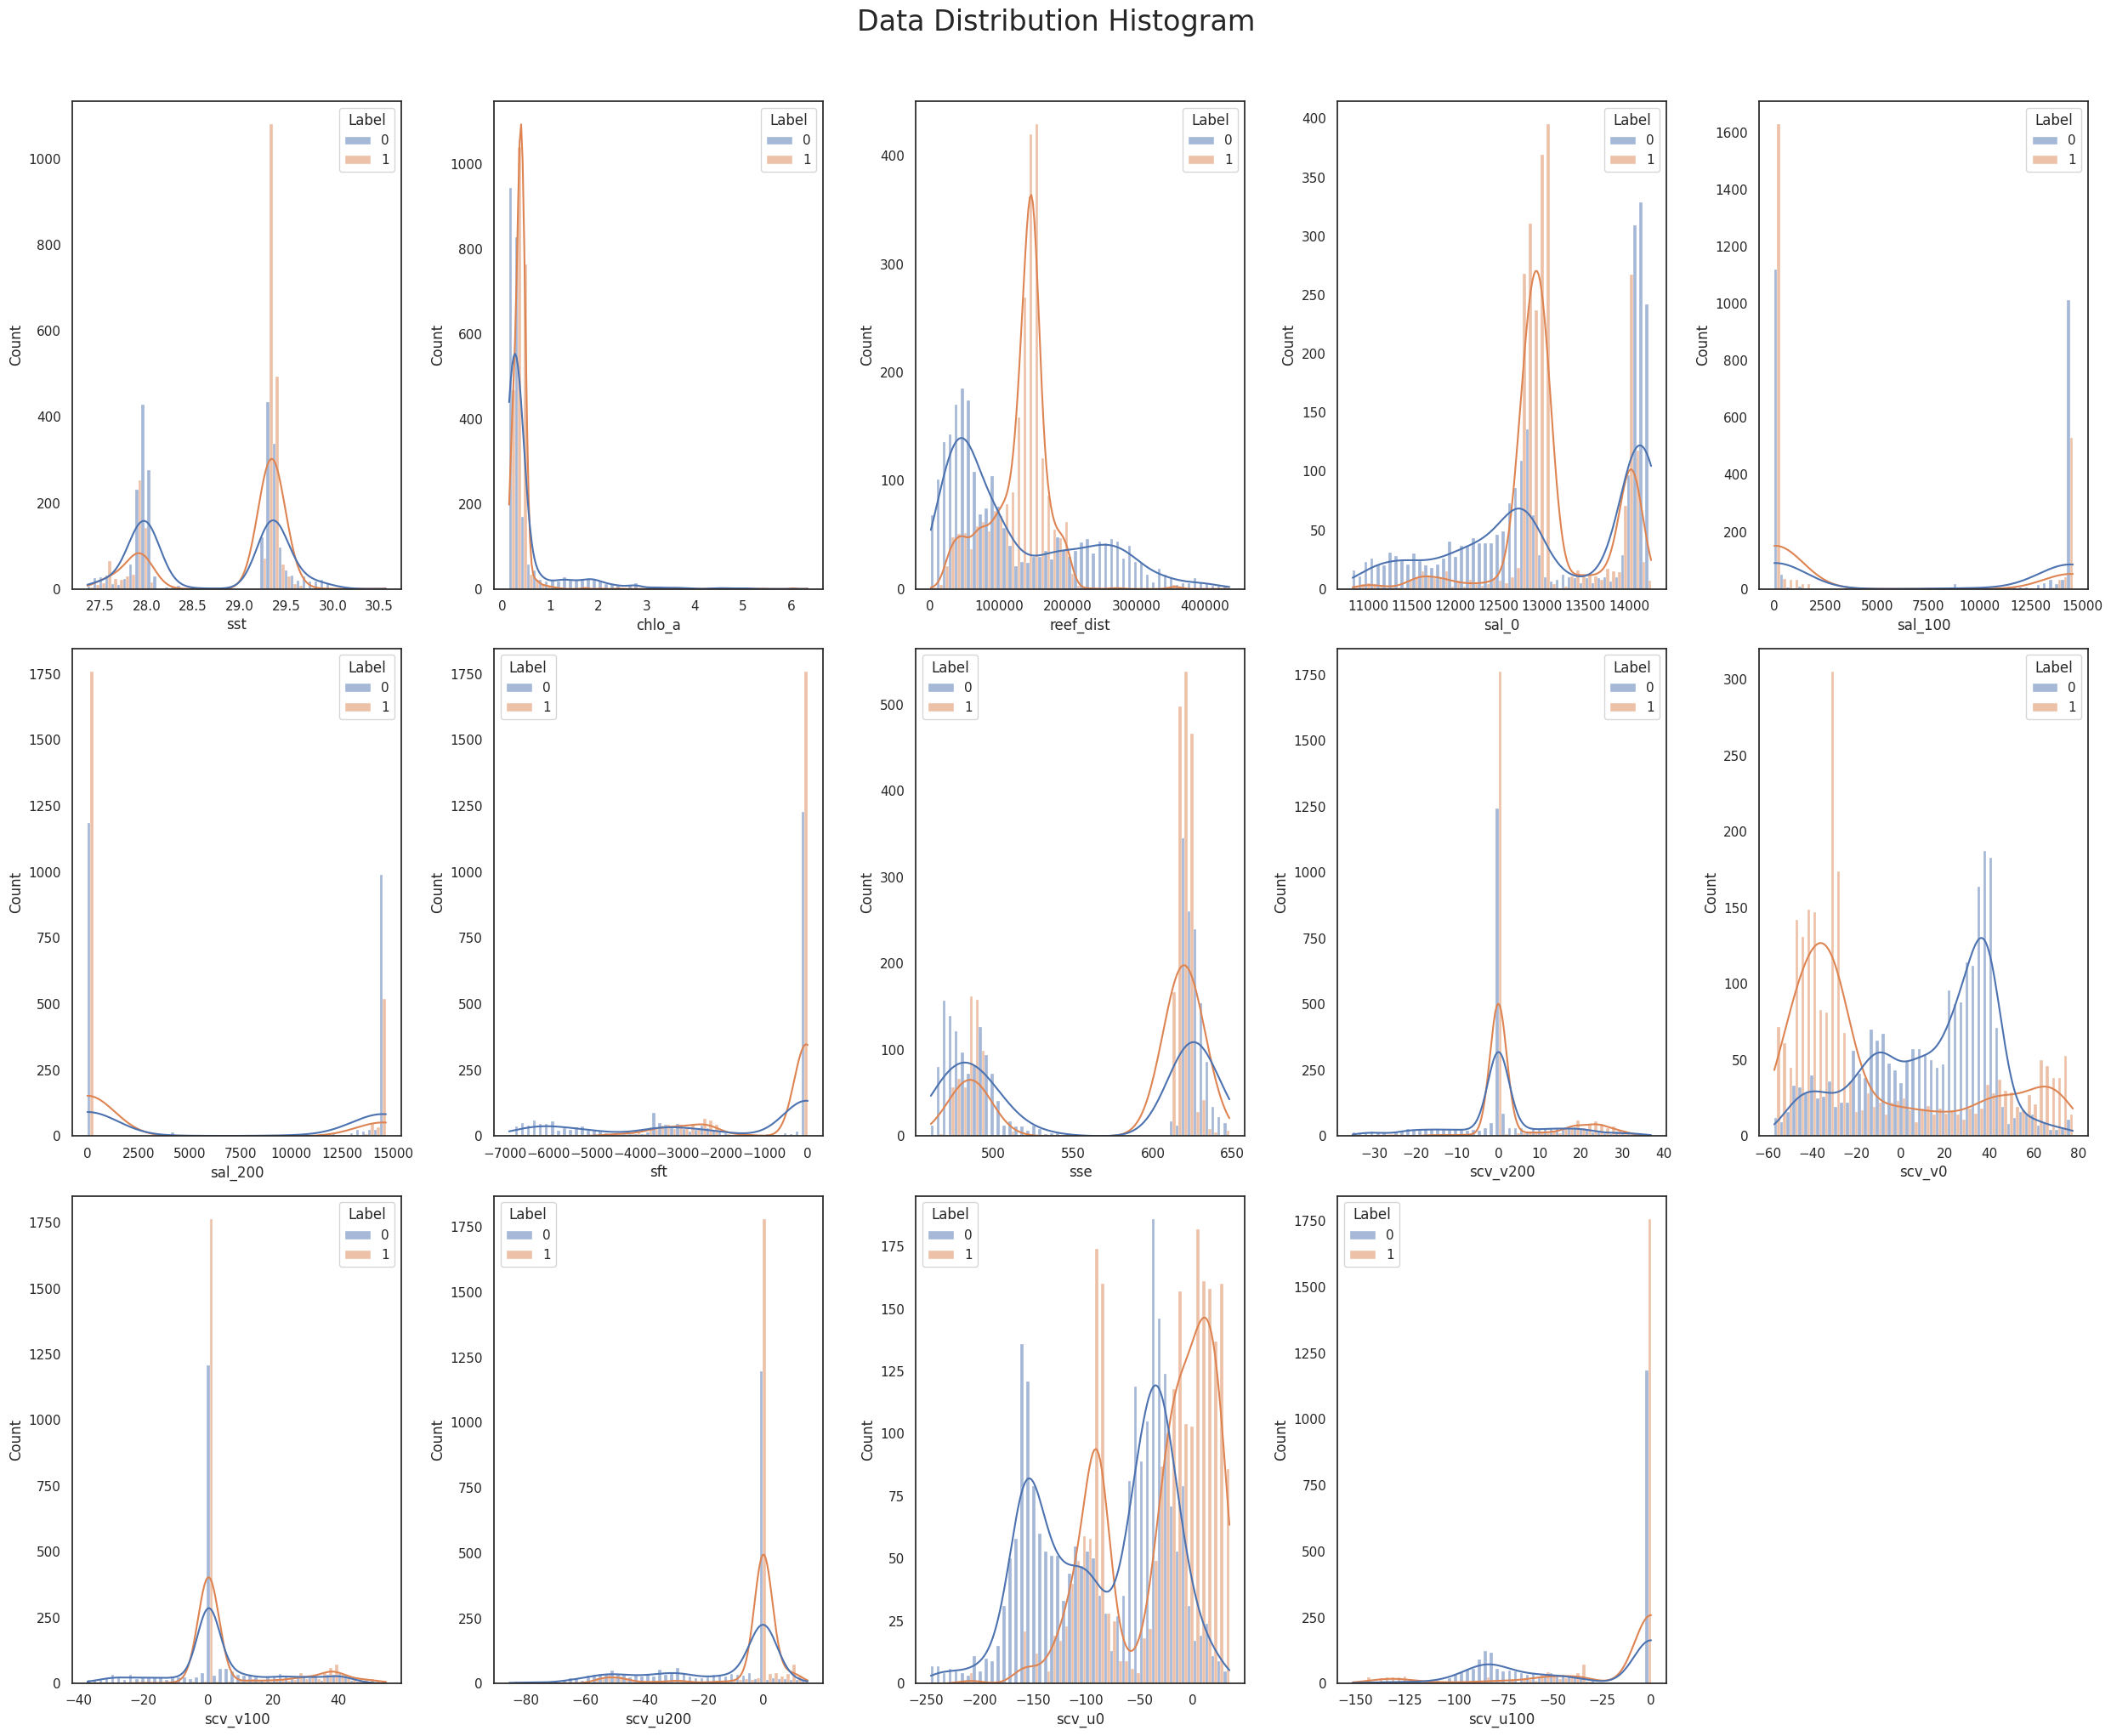

In [8]:
columns = list(sample.drop('Label', axis=1).columns)

# Setting up the plot
sns.set_theme(style="white")
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 20))
fig.suptitle('Data Distribution Histogram', y=1.02, size=24)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through columns and axes
for col, ax in zip(columns, axes):
  sns.histplot(data=sample,
               x=col,
               hue='Label',
               multiple='dodge',
               kde=True,
               bins=50,
               ax=ax)

# Hide any unused subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### 3.2. Correlation Matrix

A correlation matrix helps us identify multicollinearity, where predictor variables are highly correlated with each other. High multicollinearity can make model interpretation difficult and potentially unstable. We observe that Sea Surface Temperature (`sst`) is strongly correlated with several other variables.

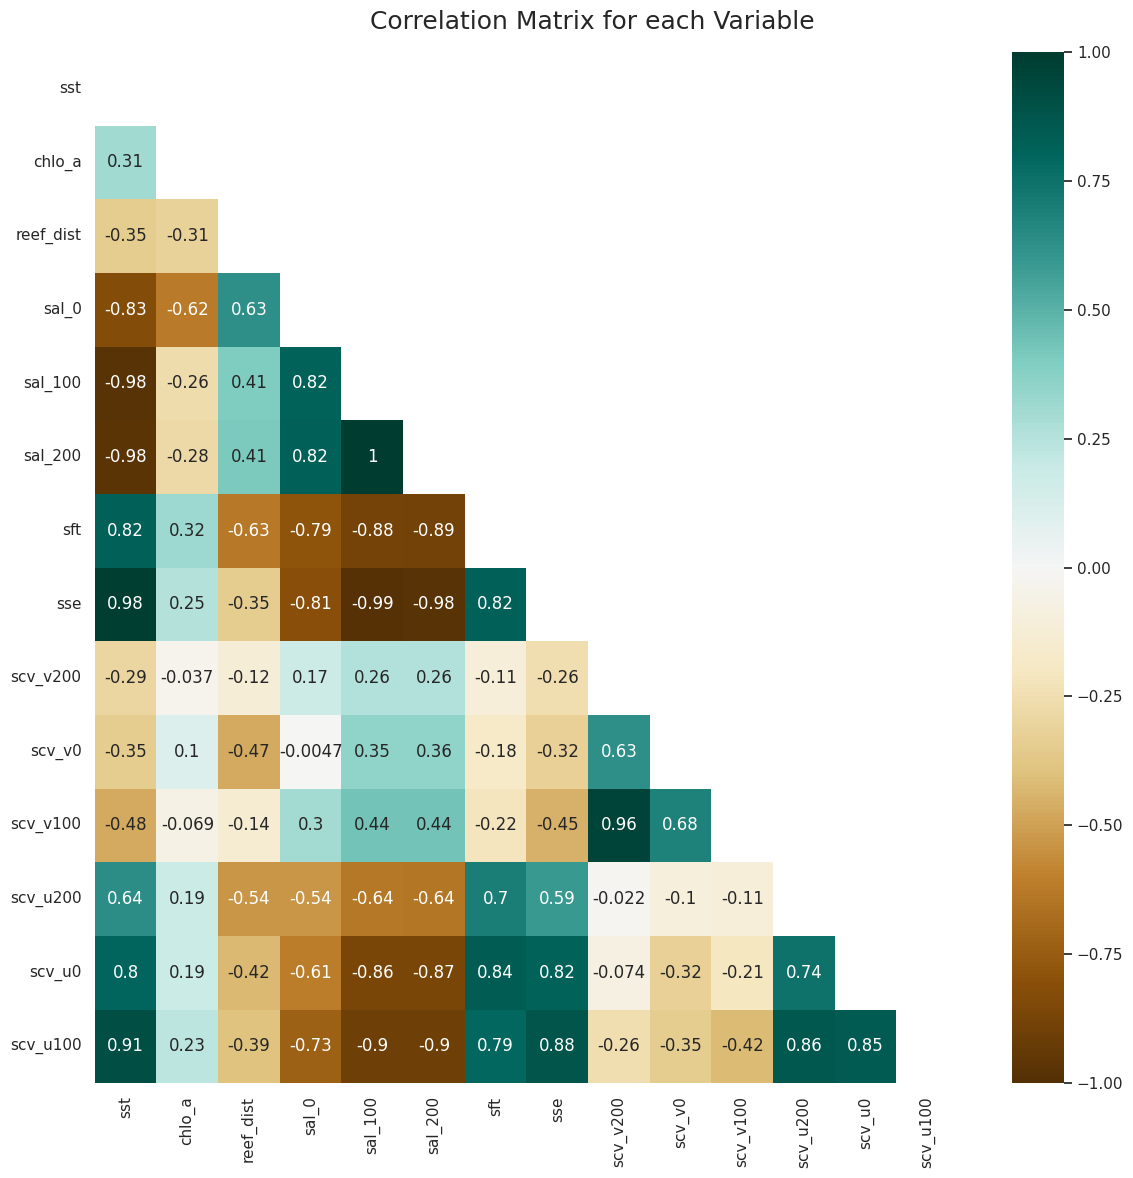

In [9]:
plt.figure(figsize=(12, 12)).suptitle('Correlation Matrix for each Variable', size=18)
c = sample.drop('Label', axis=1).corr()

sns.set_theme(style="white")

mask = np.triu(np.ones_like(c, dtype=bool))

sns.heatmap(c,cmap="BrBG", mask=mask, vmin=-1, vmax=1, annot=True)

plt.tight_layout()
plt.show()

### 3.3. Outlier Detection with Boxplots

Boxplots are an effective way to visualize the distribution of data and identify potential outliers, which can disproportionately influence model training.

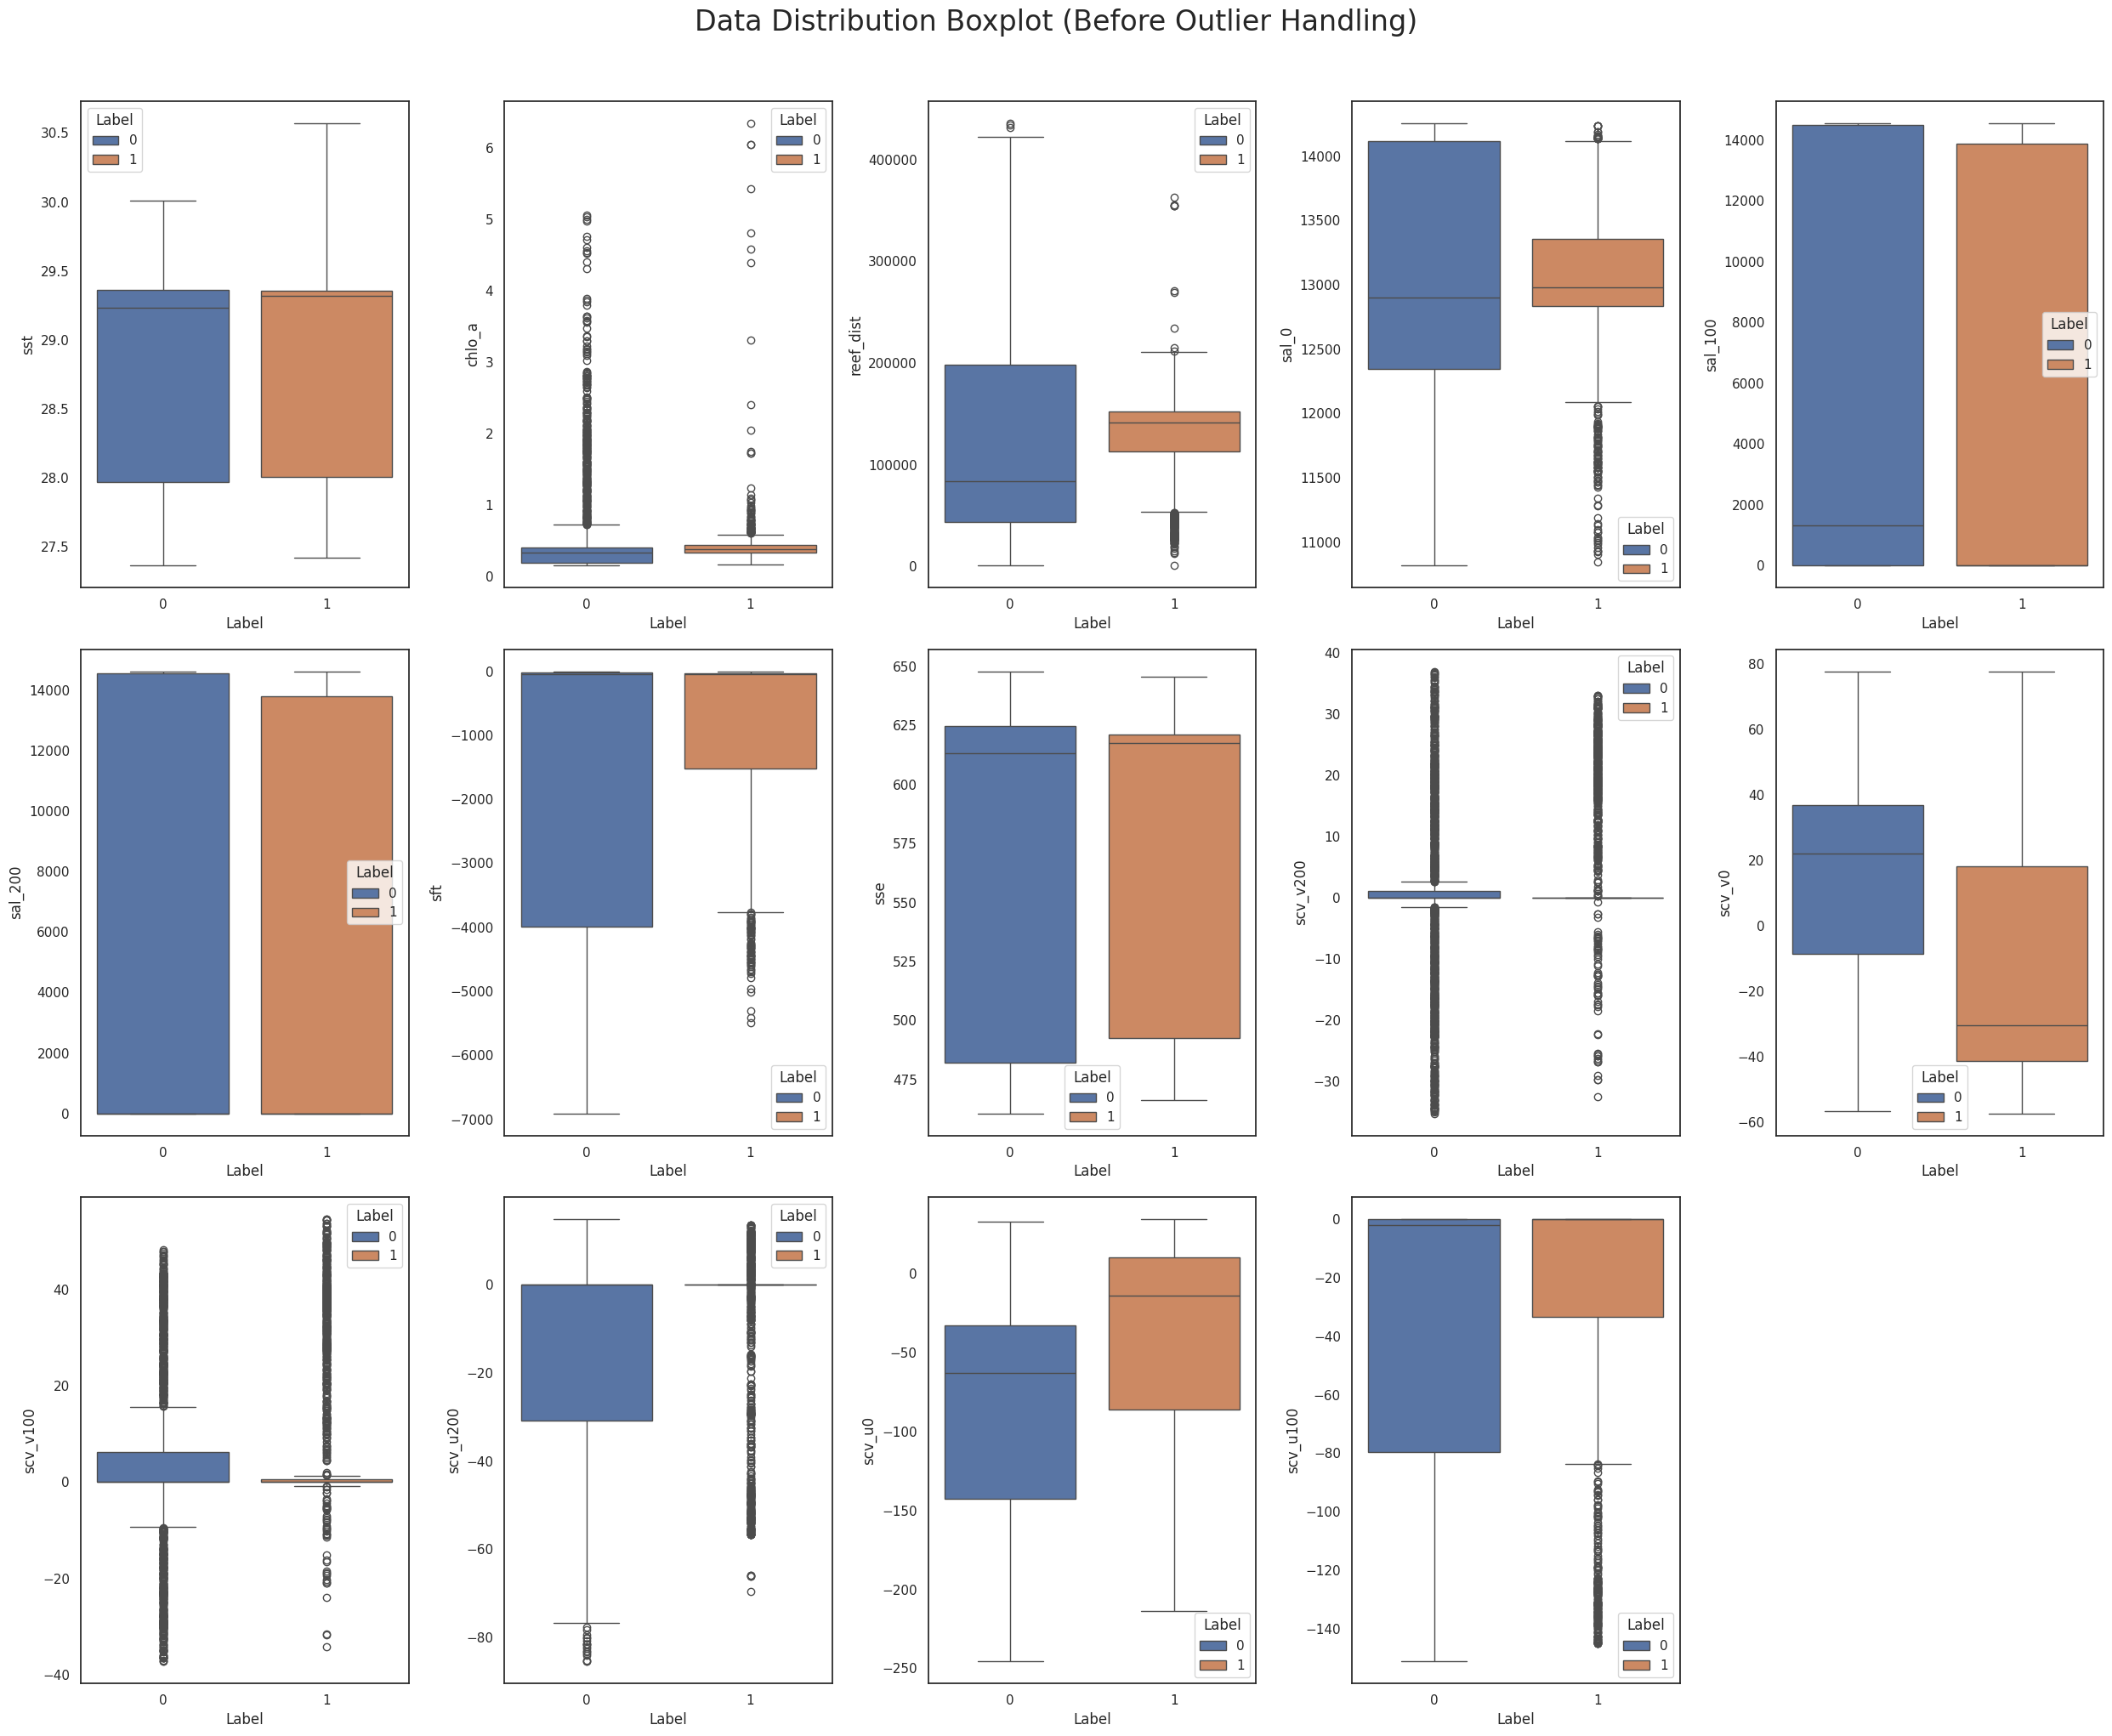

In [10]:
# Setting up the plot
sns.set_theme(style="white")
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 20))
fig.suptitle('Data Distribution Boxplot (Before Outlier Handling)', y=1.02, size=24)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through columns and axes
for col, ax in zip(columns, axes):
  sns.boxplot(data=sample,
              y=col,
              hue='Label',
              x='Label',
              ax=ax)

# Hide any unused subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

### 3.4. Handle The Outliers

To mitigate the effect of extreme values, we apply a technique called **capping**. Outliers are identified using the IQR (Interquartile Range) method and are replaced with the value at the edge of the acceptable range (1.5 * IQR). This is done separately for each label to preserve the distinct characteristics of each class.

In [11]:
# Function to detect and cap outliers for each label separately
def handle_outliers_by_label_capping(data, columns, label_col):
    # Split the data by label
    labels = data[label_col].unique()
    data_cleaned = pd.DataFrame()

    for label in labels:
        subset = data[data[label_col] == label].copy()

        for col in columns:
            # Calculate Q1 (25th percentile) and Q3 (75th percentile)
            Q1 = subset[col].quantile(0.25)
            Q3 = subset[col].quantile(0.75)
            IQR = Q3 - Q1

            # Define the lower and upper bounds for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Cap the outliers
            subset[col] = np.where(subset[col] < lower_bound, lower_bound, subset[col])
            subset[col] = np.where(subset[col] > upper_bound, upper_bound, subset[col])

        # Append the cleaned subset to the cleaned data
        data_cleaned = pd.concat([data_cleaned, subset])

    return data_cleaned

# Handle outliers by label
sample_clean = handle_outliers_by_label_capping(sample, columns, 'Label')

# Display the cleaned data
print("Shape of data after outlier handling:", sample_clean.shape)
display(sample_clean.head())

Shape of data after outlier handling: (4730, 15)


Label        sst    chlo_a     reef_dist         sal_0   sal_100  sal_200  \
0      0  29.248841  0.312147  61673.620191  12862.789887  525.0610      0.0   
1      0  29.358681  0.351898  43346.192418  12671.255489    0.0000      0.0   
2      0  29.334430  0.313653  44211.378885  12560.390154    0.0000      0.0   
3      0  29.848909  0.717793  18837.369164  10842.940740    0.0000      0.0   
4      0  29.288901  0.332242  44200.107467  12800.840398   45.1028      0.0   

         sft         sse  scv_v200     scv_v0  scv_v100  scv_u200     scv_u0  \
0 -48.123563  619.690936       0.0  23.375983  0.263030       0.0  -0.721000   
1 -26.285714  622.744017       0.0  21.943038  0.000000       0.0 -32.865461   
2 -43.641723  623.793087       0.0  43.278011  0.000000       0.0 -32.746550   
3  -2.135246  647.983767       0.0  43.189462  0.000000       0.0 -46.886392   
4 -33.929705  620.983280       0.0  15.572821 -0.004075       0.0 -14.318315   

   scv_u100  
0 -0.813053  
1  0.000000  
2  0.000000  
3  0.000000  
4 -0.050436

Let's visualize the boxplots again to confirm that the outliers have been handled.

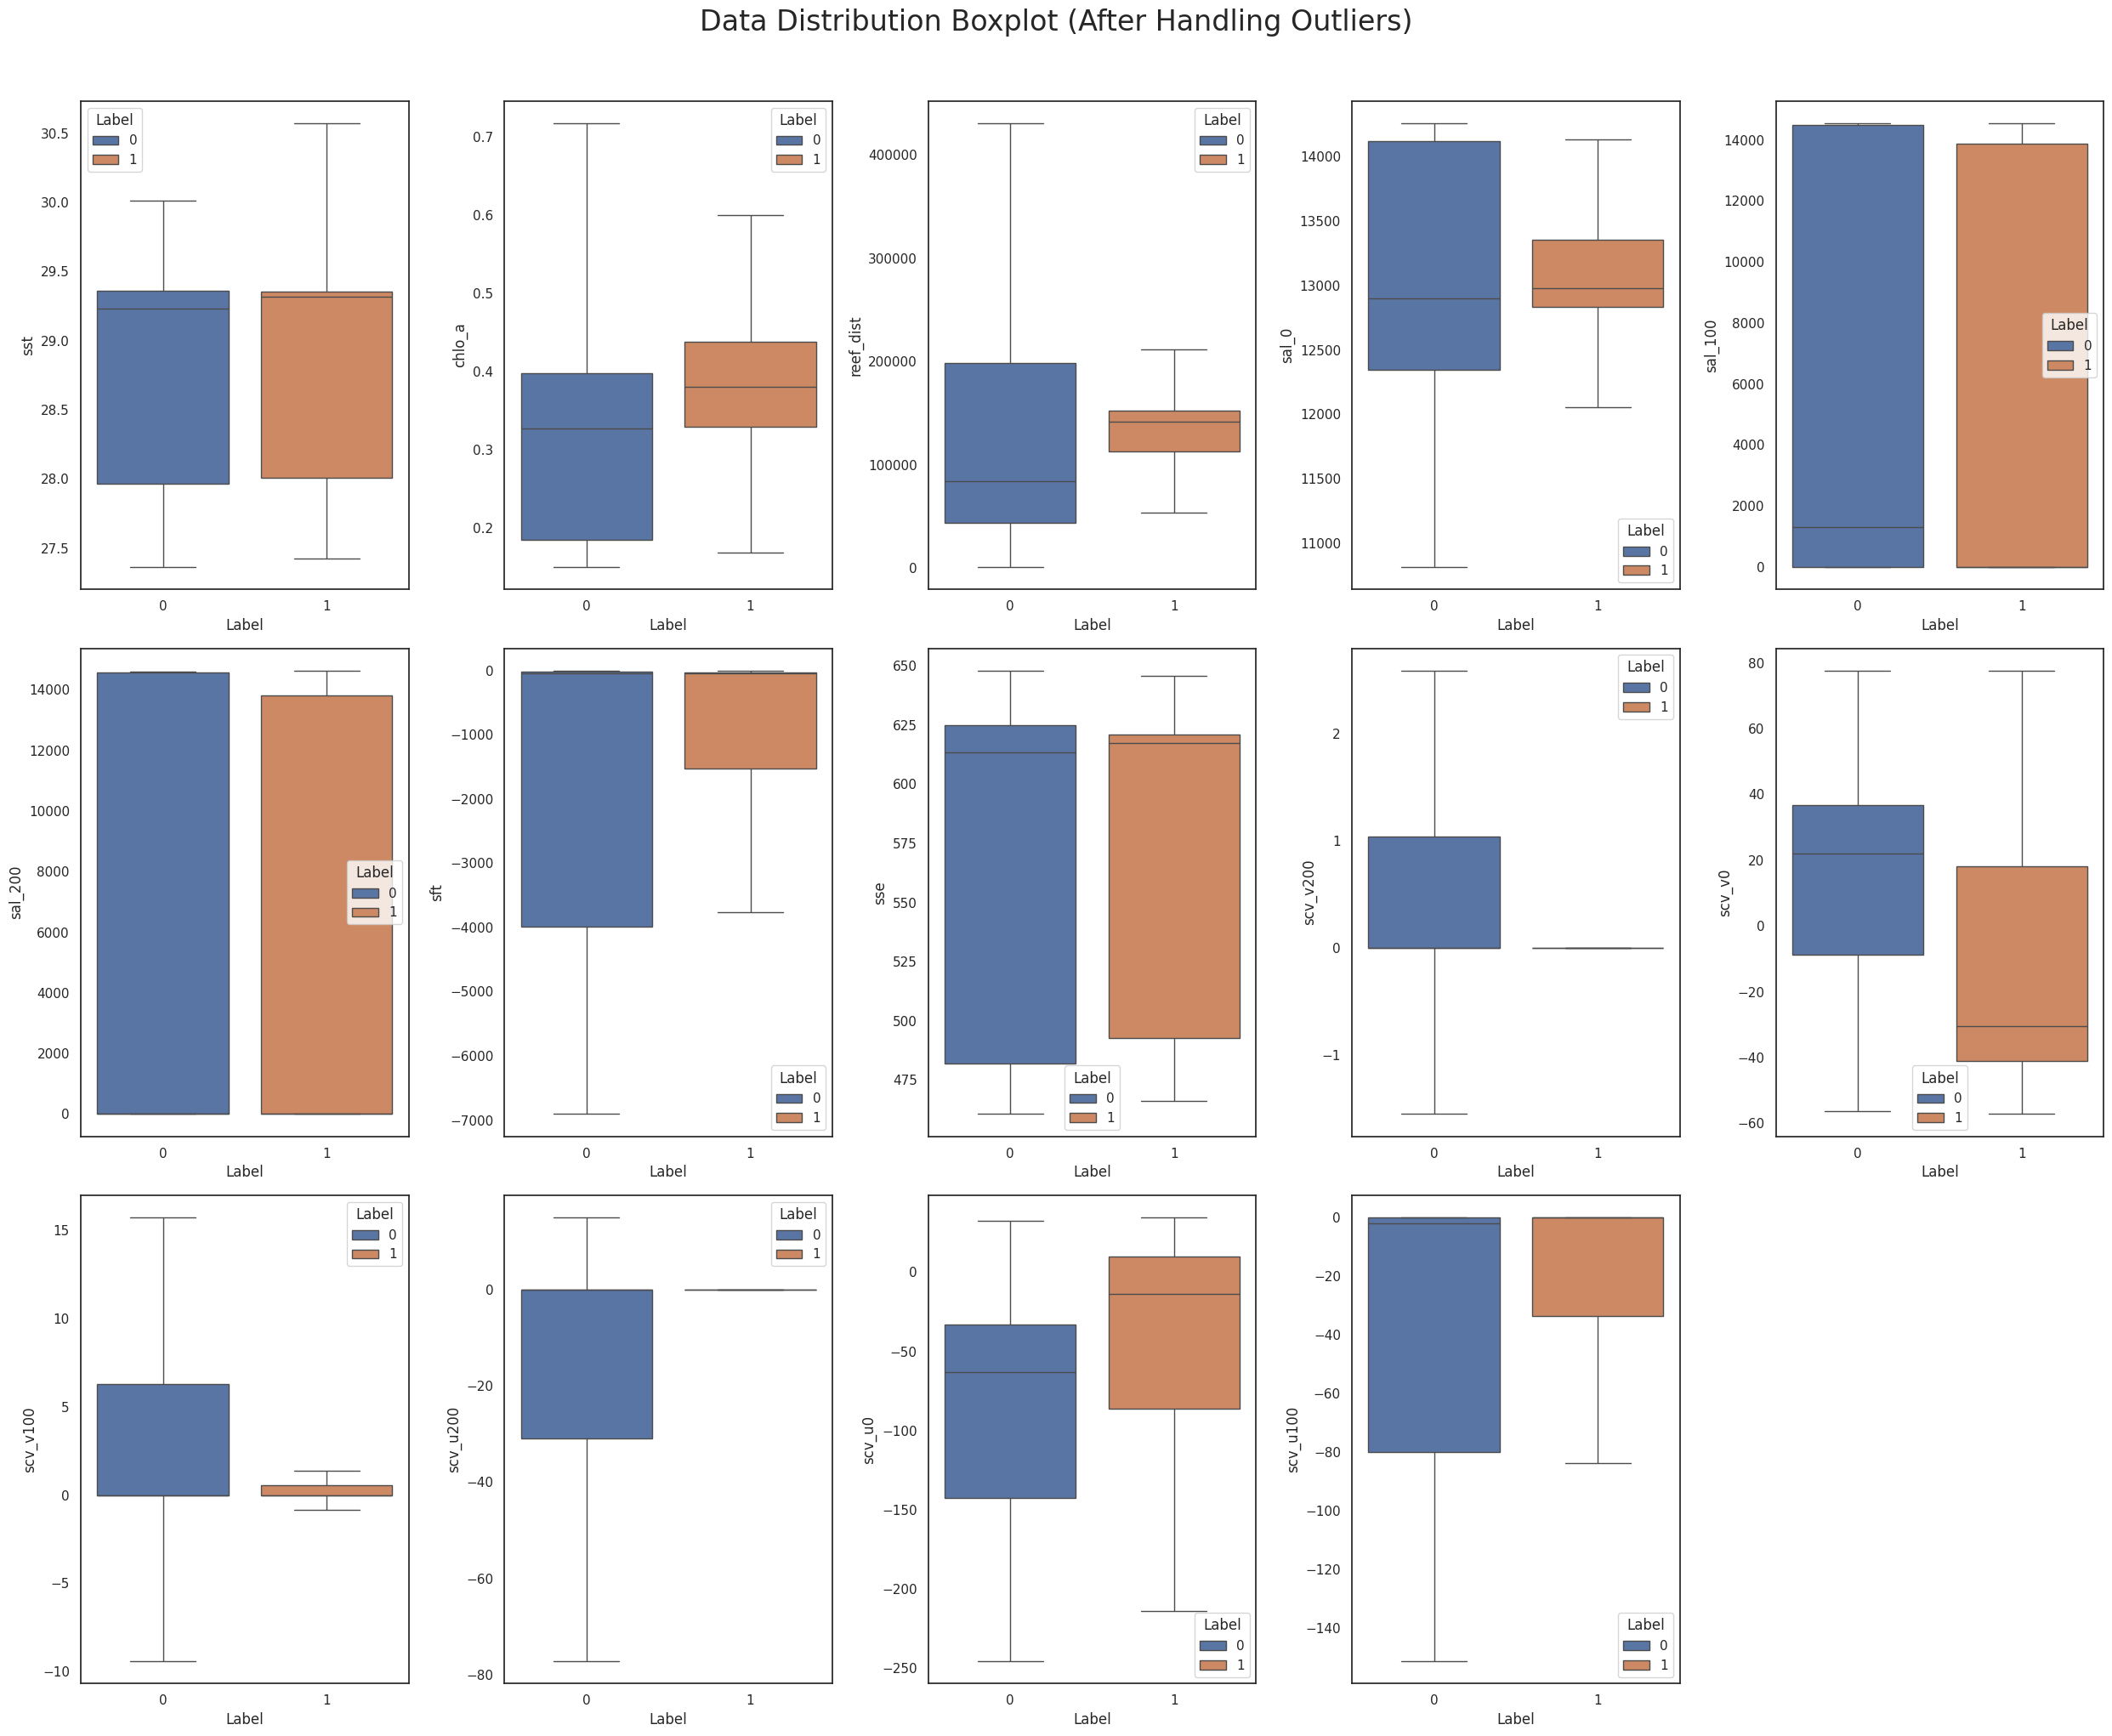

In [12]:
# Setting up the plot
sns.set_theme(style="white")
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 20))
fig.suptitle('Data Distribution Boxplot (After Handling Outliers)', y=1.02, size=24)

# Flatten the axes for easy iteration
axes = axes.flatten()

# Loop through columns and axes
for col, ax in zip(columns, axes):
  sns.boxplot(data=sample_clean,
              y=col,
              hue='Label',
              x='Label',
              ax=ax)

# Hide any unused subplots
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

Finally, we check the min/max values of our variables. The wide differences in scale (e.g., `reef_dist` vs. `chlo_a`) confirm that feature scaling will be necessary for many machine learning models to perform optimally.

In [13]:
min_max = pd.DataFrame({
    'min': sample_clean.min(),
    'max': sample_clean.max()
})
display(min_max)

min            max
Label          0.000000       1.000000
sst           27.364746      30.570490
chlo_a         0.149898       0.717793
reef_dist    998.378632  430814.182720
sal_0      10818.801065   14254.796202
sal_100        0.000000   14546.600000
sal_200        0.000000   14631.500000
sft        -6907.124717      -0.814208
sse          460.598895     647.983767
scv_v200      -1.551334       2.585557
scv_v0       -57.225554      77.675094
scv_v100      -9.427033      15.711719
scv_u200     -77.201365      14.906501
scv_u0      -245.570023      34.312450
scv_u100    -151.218431       0.000000

## 4. Modeling Preparation

### 4.1. Universal Model Evaluation Function

To maintain consistency and avoid code repetition, we define a comprehensive `evaluate_model` function. This function will train a given model and produce a full suite of evaluation metrics and visualizations:
- Accuracy Score
- Confusion Matrix
- Classification Report (Precision, Recall, F1-Score)
- ROC Curve and AUC Score
- Feature Importance/Coefficients Plot
- Learning Curve

In [14]:
def evaluate_model(model, X_train, y_train, X_test, y_test, cv=None):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Classification Report
    report = classification_report(y_test, y_pred)
    print("Classification Report:")
    print(report)

    # ROC Curve and AUC
    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        print(f"AUC: {roc_auc:.4f}")
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()

    # Feature Importance or Coefficients
    feature_names = X_train.columns if isinstance(X_train, pd.DataFrame) else [f'feature_{i}' for i in range(X_train.shape[1])]

    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        print("\nFeature Importance:")
        display(feature_importance_df)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df, orient='h')
        plt.title('Feature Importance')
        plt.tight_layout()
        plt.show()

    elif hasattr(model, "coef_"):
        importances = np.abs(model.coef_[0])
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
        print("\nFeature Coefficients (Importance):")
        display(feature_importance_df)

        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df, orient='h')
        plt.title('Feature Coefficients (Importance)')
        plt.tight_layout()
        plt.show()
    # Note: The following block for Permutation Importance requires the 'eli5' library.
    # It's commented out to avoid errors if the library is not installed.
    # else:
    #     from eli5.sklearn import PermutationImportance
    #     import eli5
    #     perm_importance = PermutationImportance(model, random_state=42).fit(X_test, y_test)
    #     display(eli5.show_weights(perm_importance, feature_names=feature_names))

    # Plot Learning Curve
    plt.figure()
    plt.title(f'Learning Curve for {type(model).__name__}')
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=cv, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.legend(loc="best")
    plt.show()

### 4.2. Model Definitions

We define a dictionary of classification models that we will test. This allows us to easily iterate through them during our experiments.

In [22]:
# Define models with common parameters

models = {
    'SVC': SVC(C=1.0, kernel='rbf', probability=True),
    'Logistic Regression': LogisticRegression(C=1.0, solver='lbfgs', max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='uniform'),
    'Decision Tree': DecisionTreeClassifier(max_depth=None, min_samples_split=2),
    'Random Forest': RandomForestClassifier(n_estimators=100, max_depth=None),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3),
    'MLP': MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=1000)
}


## 5. Modeling Experiments

We will now proceed with the five planned experiments.

### 5.1. Experiment 1: Baseline Model (All Features)

**Rationale:** Our first experiment serves as a baseline. We train our suite of models using all available features after outlier handling and scaling. This will give us a performance benchmark to compare against subsequent, more refined experiments.

#### 5.1.1. Data Preparation

In [23]:
# Split the data into feature (X) and target (y)
X = sample_clean.drop('Label', axis=1)
y = sample_clean['Label']

# Partitioning X and y into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scaling definition (MinMaxScaler is suitable for features with different ranges)
scaler = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform the testing data using the parameters learned from training data
X_test_scaled = scaler.transform(X_test)

# Convert the scaled data back to DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print(f'num of X_train: {len(X_train)}\n',
      f'num of X_test: {len(X_test)}\n',
      f'num of y_train: {len(y_train)}\n',
      f'num of y_test: {len(y_test)}\n')

display(X_train_scaled_df.describe())

num of X_train: 3547
 num of X_test: 1183
 num of y_train: 3547
 num of y_test: 1183



sst       chlo_a    reef_dist        sal_0      sal_100  \
count  3547.000000  3547.000000  3547.000000  3547.000000  3547.000000   
mean      0.454199     0.371233     0.295355     0.669548     0.374082   
std       0.224896     0.257434     0.178241     0.236773     0.476242   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.190472     0.146076     0.143765     0.570427     0.000000   
50%       0.607253     0.375807     0.304296     0.626709     0.000424   
75%       0.620994     0.488802     0.361369     0.933093     0.996439   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

           sal_200          sft          sse     scv_v200       scv_v0  \
count  3547.000000  3547.000000  3547.000000  3547.000000  3547.000000   
mean      0.367066     0.793087     0.585843     0.411797     0.429354   
std       0.475095     0.300322     0.357613     0.243655     0.275059   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.582238     0.153052     0.375000     0.186099   
50%       0.000000     0.993683     0.835242     0.375000     0.401519   
75%       0.994836     0.996137     0.866435     0.375000     0.684193   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          scv_v100     scv_u200       scv_u0     scv_u100  
count  3547.000000  3547.000000  3547.000000  3547.000000  
mean      0.428885     0.753642     0.674866     0.820020  
std       0.225501     0.189949     0.221158     0.248526  
min       0.000000     0.000000     0.000000     0.000000  
25%       0.375000     0.838163     0.514305     0.589415  
50%       0.375000     0.838163     0.742569     0.999968  
75%       0.430438     0.838163     0.851036     1.000000  
max       1.000000     1.000000     1.000000     1.000000

#### 5.1.2. Model Evaluation

### Evaluating SVC... ###

Accuracy: 0.9467
Confusion Matrix:
[[576  32]
 [ 31 544]]


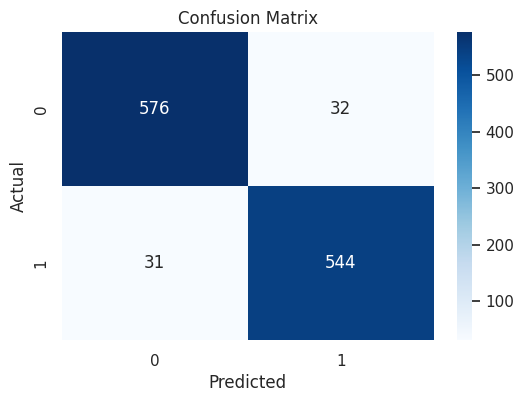

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       608
           1       0.94      0.95      0.95       575

    accuracy                           0.95      1183
   macro avg       0.95      0.95      0.95      1183
weighted avg       0.95      0.95      0.95      1183

AUC: 0.9849


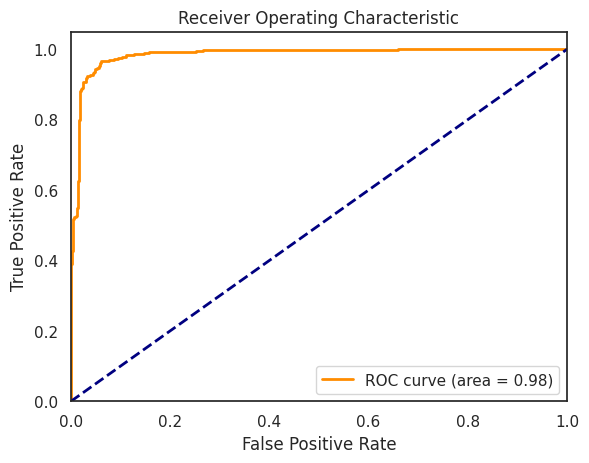

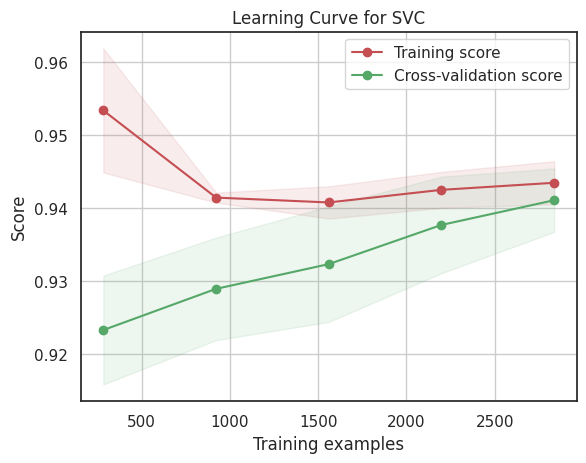


--------------------------------------------------------------------------------

### Evaluating Logistic Regression... ###

Accuracy: 0.9036
Confusion Matrix:
[[535  73]
 [ 41 534]]


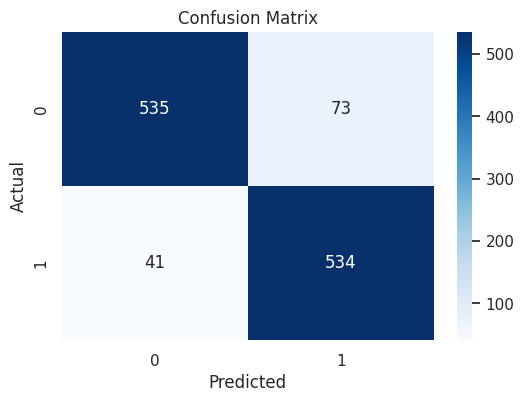

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       608
           1       0.88      0.93      0.90       575

    accuracy                           0.90      1183
   macro avg       0.90      0.90      0.90      1183
weighted avg       0.90      0.90      0.90      1183

AUC: 0.9631


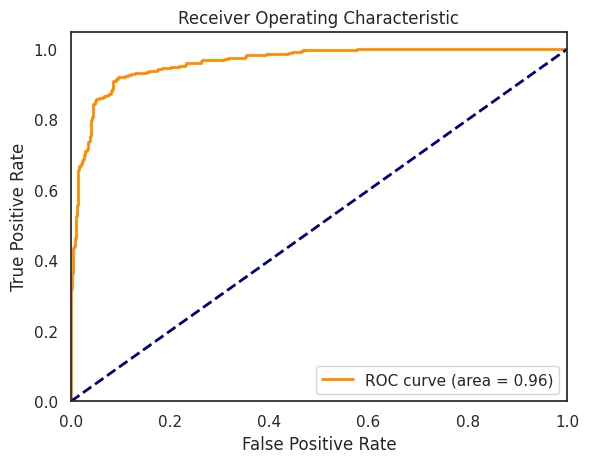


Feature Coefficients (Importance):


Feature  Importance
11   scv_u200   13.357930
3       sal_0    8.561585
2   reef_dist    8.108759
6         sft    5.112671
1      chlo_a    4.493056
10   scv_v100    4.218413
12     scv_u0    3.059385
7         sse    3.017765
5     sal_200    2.246879
13   scv_u100    1.705658
0         sst    0.959917
8    scv_v200    0.634610
4     sal_100    0.520263
9      scv_v0    0.326231

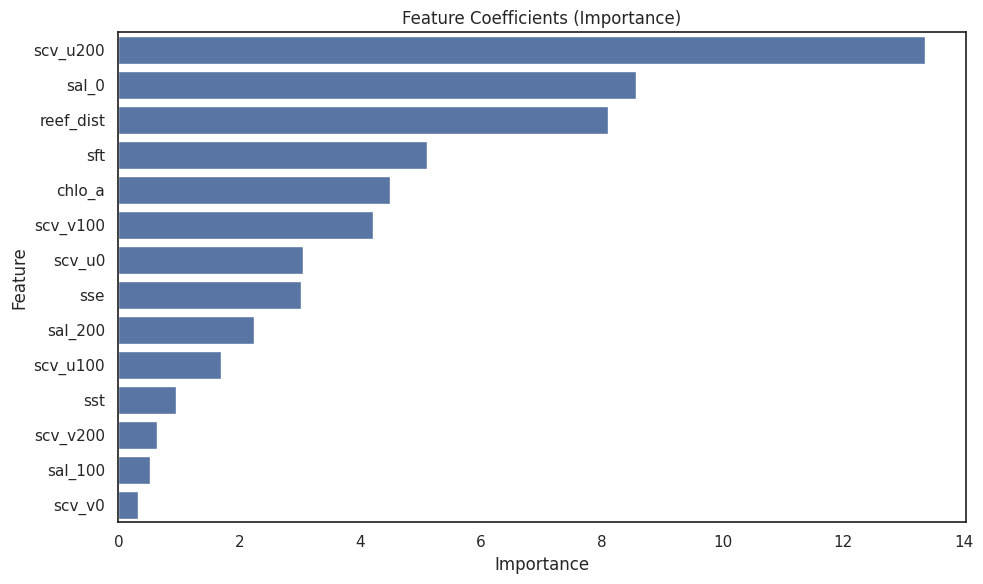

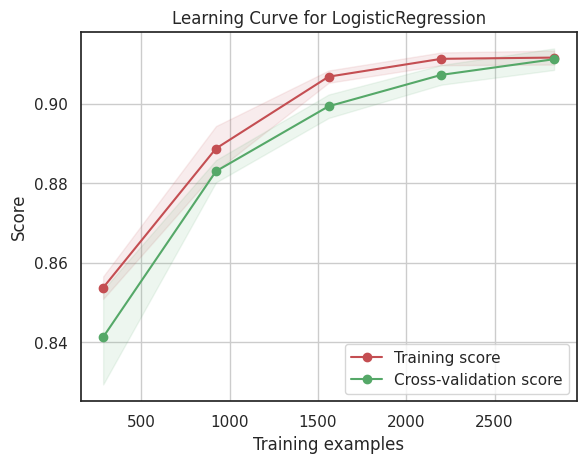


--------------------------------------------------------------------------------

### Evaluating KNN... ###

Accuracy: 0.9789
Confusion Matrix:
[[600   8]
 [ 17 558]]


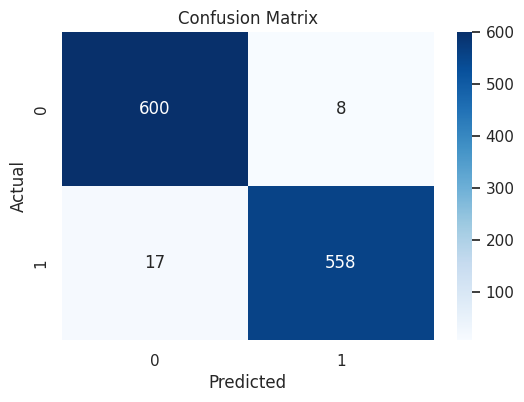

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       608
           1       0.99      0.97      0.98       575

    accuracy                           0.98      1183
   macro avg       0.98      0.98      0.98      1183
weighted avg       0.98      0.98      0.98      1183

AUC: 0.9938


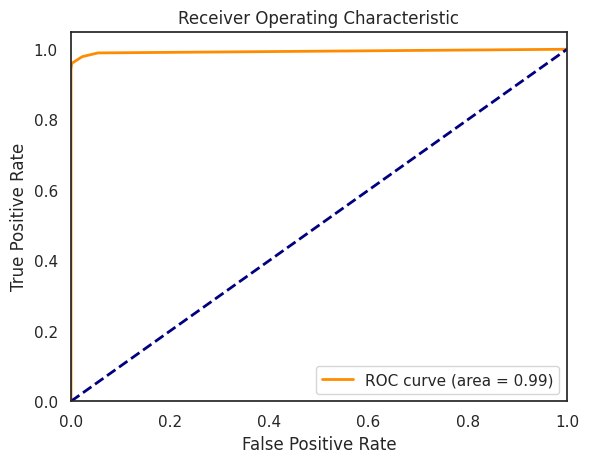

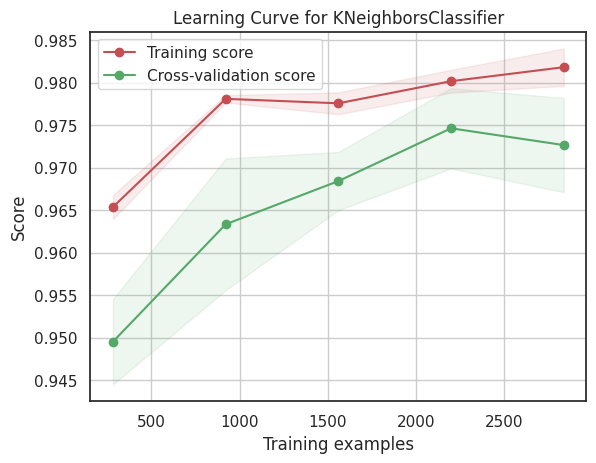


--------------------------------------------------------------------------------

### Evaluating Decision Tree... ###

Accuracy: 0.9789
Confusion Matrix:
[[597  11]
 [ 14 561]]


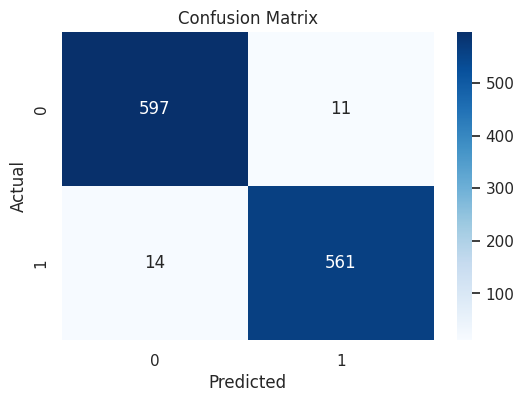

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       608
           1       0.98      0.98      0.98       575

    accuracy                           0.98      1183
   macro avg       0.98      0.98      0.98      1183
weighted avg       0.98      0.98      0.98      1183

AUC: 0.9788


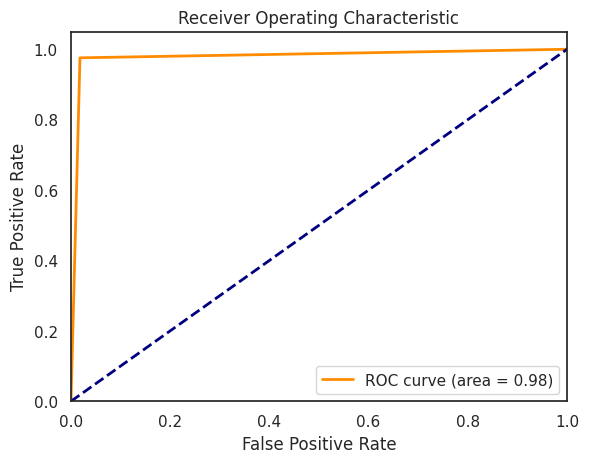


Feature Importance:


Feature  Importance
2   reef_dist    0.428443
11   scv_u200    0.384800
12     scv_u0    0.085985
13   scv_u100    0.021355
3       sal_0    0.021252
0         sst    0.018243
9      scv_v0    0.014134
7         sse    0.008013
1      chlo_a    0.007179
6         sft    0.006297
10   scv_v100    0.003454
4     sal_100    0.000846
5     sal_200    0.000000
8    scv_v200    0.000000

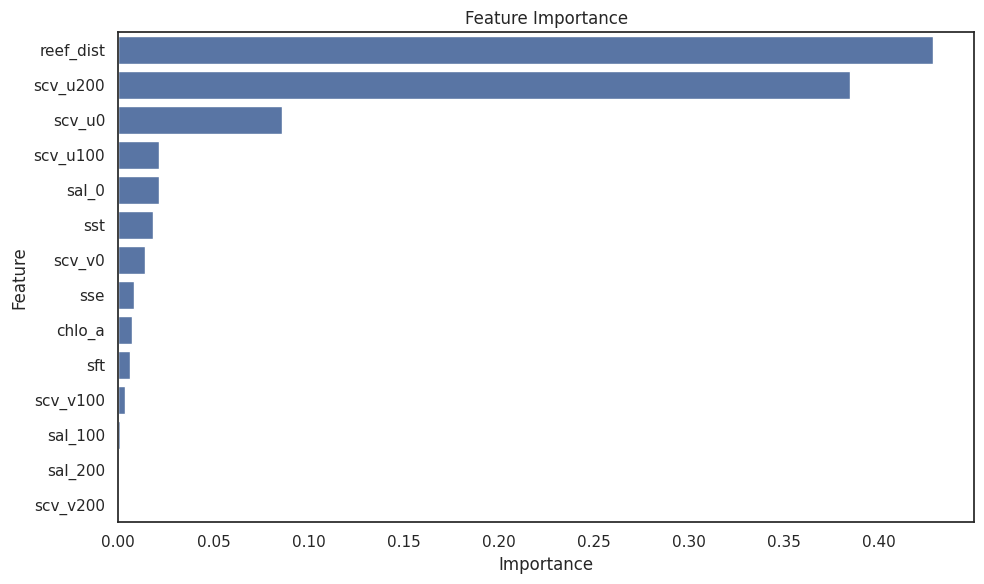

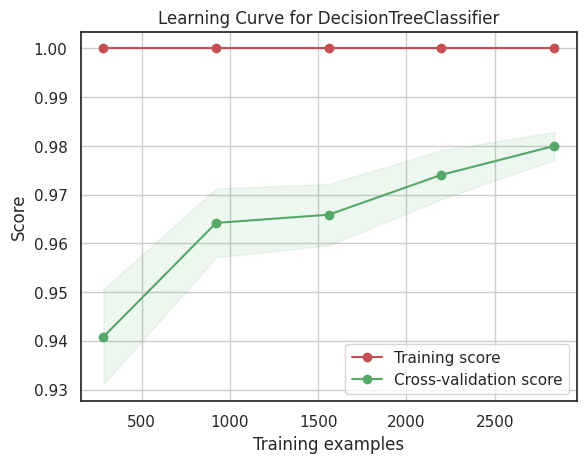


--------------------------------------------------------------------------------

### Evaluating Random Forest... ###

Accuracy: 0.9882
Confusion Matrix:
[[602   6]
 [  8 567]]


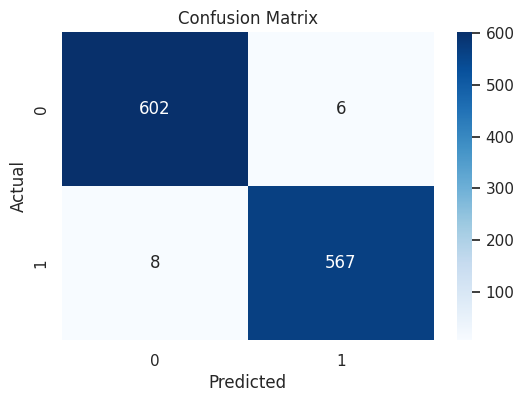

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       608
           1       0.99      0.99      0.99       575

    accuracy                           0.99      1183
   macro avg       0.99      0.99      0.99      1183
weighted avg       0.99      0.99      0.99      1183

AUC: 0.9994


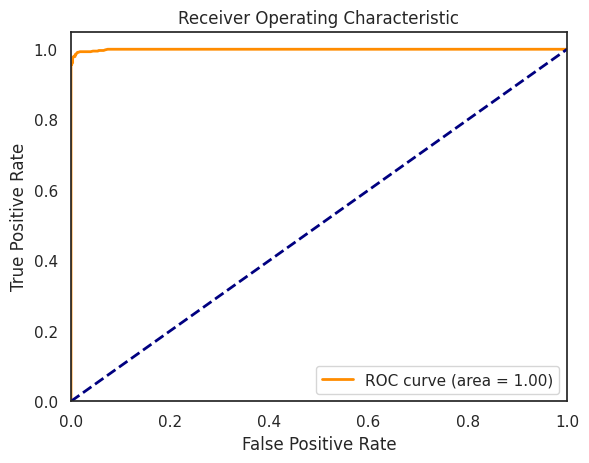


Feature Importance:


Feature  Importance
9      scv_v0    0.139912
11   scv_u200    0.139518
2   reef_dist    0.133145
12     scv_u0    0.101576
3       sal_0    0.088768
10   scv_v100    0.074549
8    scv_v200    0.059999
7         sse    0.057118
1      chlo_a    0.056101
6         sft    0.053427
4     sal_100    0.030333
0         sst    0.026246
5     sal_200    0.021291
13   scv_u100    0.018019

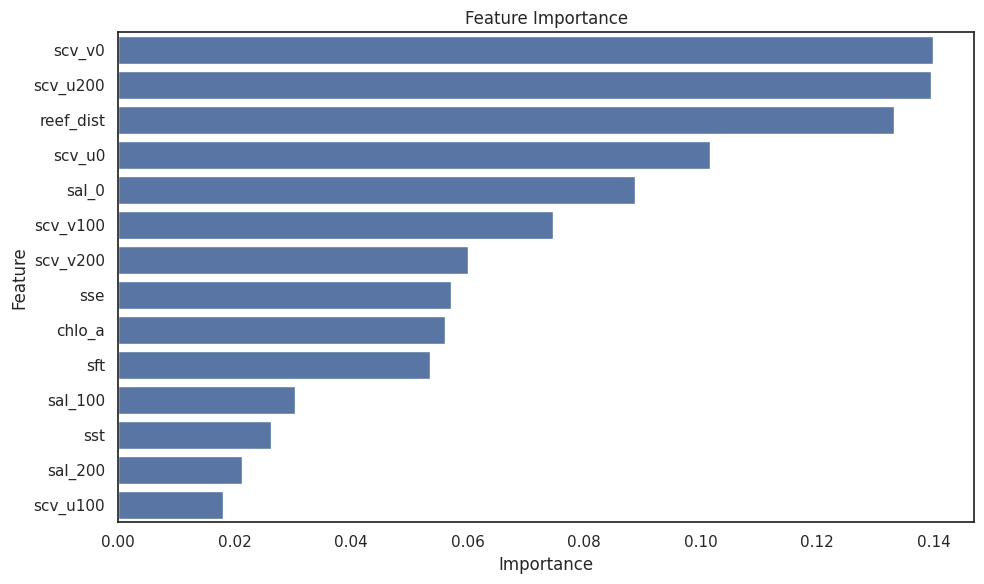

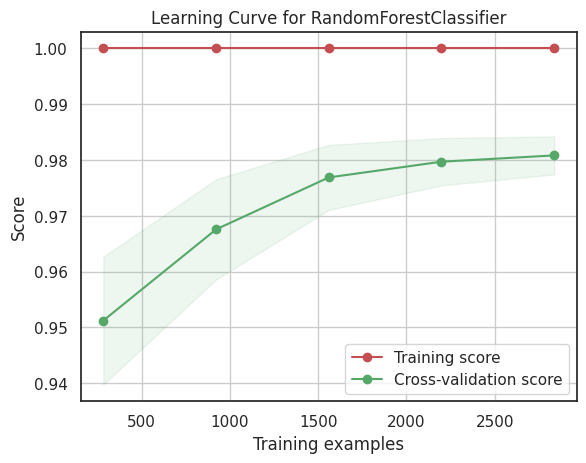


--------------------------------------------------------------------------------

### Evaluating Gradient Boosting... ###

Accuracy: 0.9822
Confusion Matrix:
[[597  11]
 [ 10 565]]


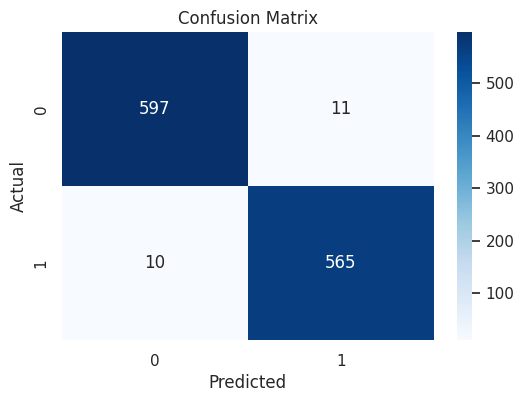

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       608
           1       0.98      0.98      0.98       575

    accuracy                           0.98      1183
   macro avg       0.98      0.98      0.98      1183
weighted avg       0.98      0.98      0.98      1183

AUC: 0.9984


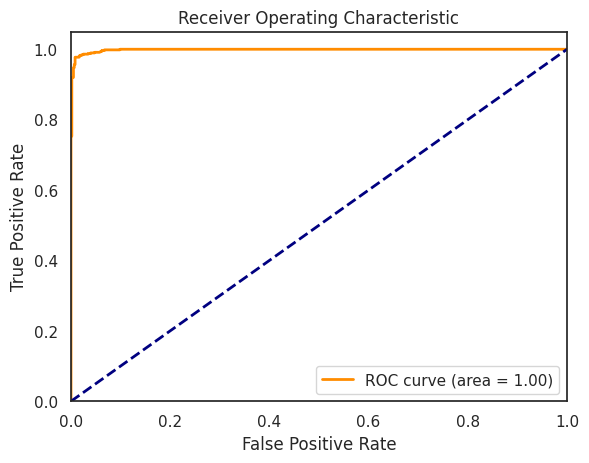


Feature Importance:


Feature  Importance
11   scv_u200    0.288434
2   reef_dist    0.278964
9      scv_v0    0.141542
3       sal_0    0.071957
10   scv_v100    0.059137
12     scv_u0    0.055416
5     sal_200    0.028916
8    scv_v200    0.027212
1      chlo_a    0.026049
4     sal_100    0.007526
6         sft    0.005936
7         sse    0.003863
0         sst    0.003282
13   scv_u100    0.001768

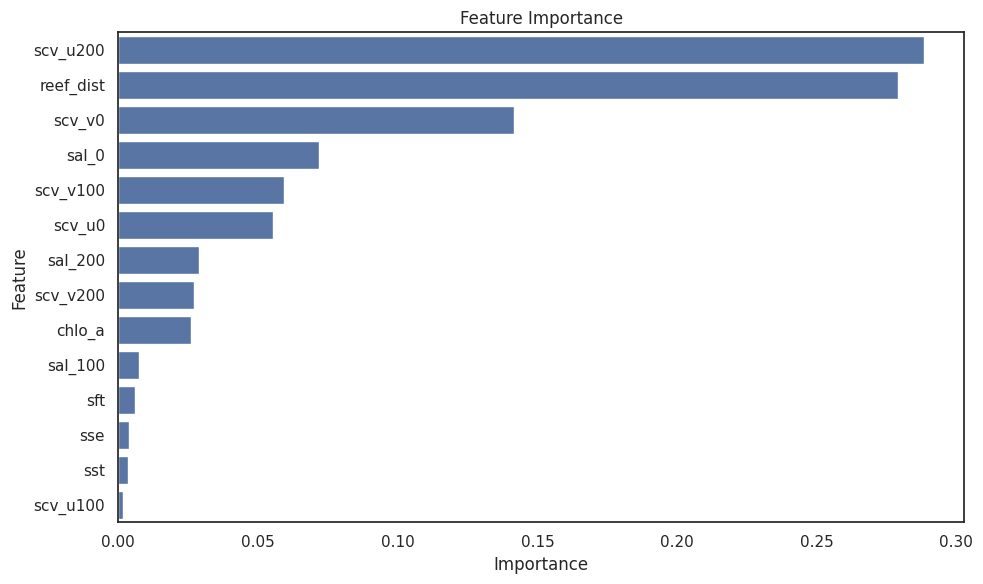

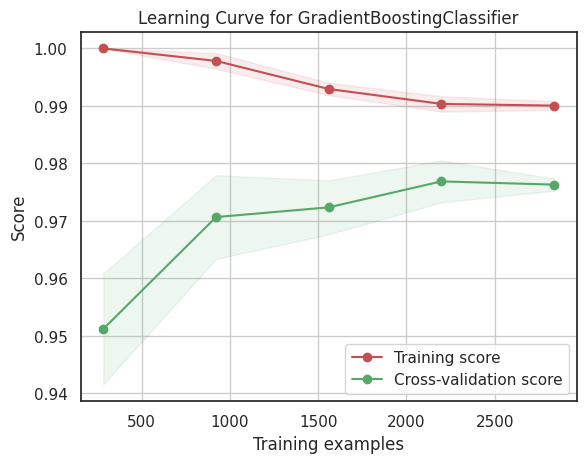


--------------------------------------------------------------------------------

### Evaluating MLP... ###

Accuracy: 0.9577
Confusion Matrix:
[[581  27]
 [ 23 552]]


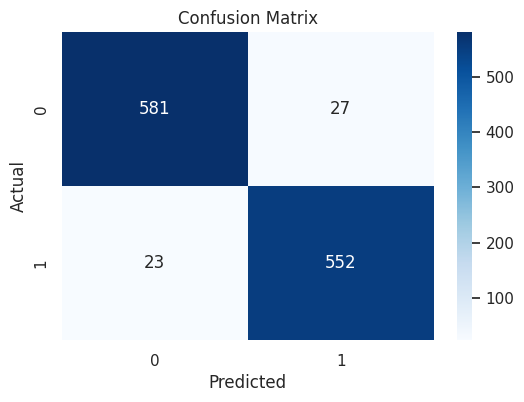

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       608
           1       0.95      0.96      0.96       575

    accuracy                           0.96      1183
   macro avg       0.96      0.96      0.96      1183
weighted avg       0.96      0.96      0.96      1183

AUC: 0.9940


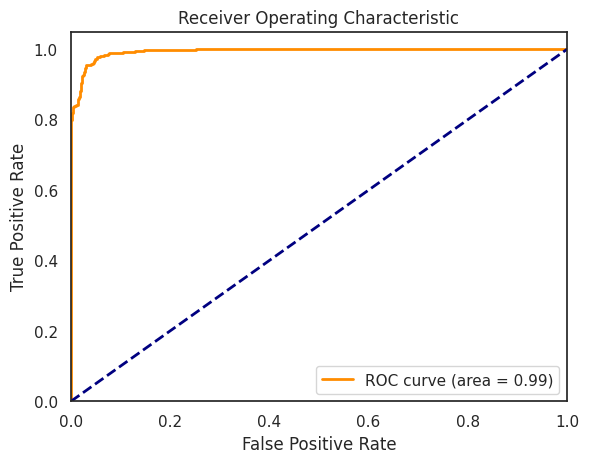

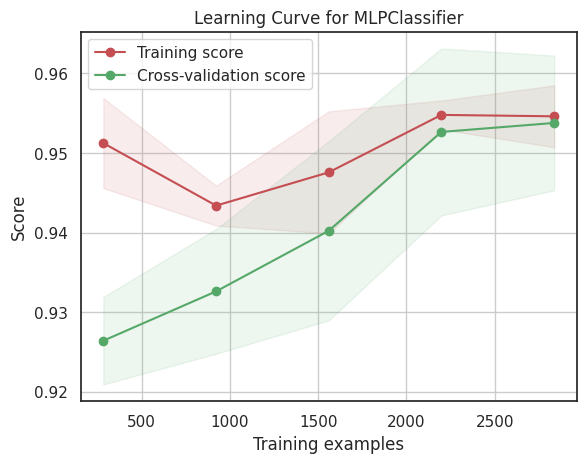


--------------------------------------------------------------------------------



In [24]:
# Evaluate each model
for model_name, model in models.items():
    print(f"### Evaluating {model_name}... ###\n")
    evaluate_model(model, X_train_scaled_df, y_train, X_test_scaled_df, y_test, cv=5)
    print("\n" + "-"*80 + "\n")

#### 5.1.3. Prediction and Spatialization

Now we use the trained models to predict the fishing potential for the entire study area. We scale the `variable` dataset using the same scaler fitted on our training data, make predictions, and convert the results into raster files (.tif) for visualization in GIS software.

In [25]:
# Prepare the data that contains variable information only
variable_only = variable.drop(['x', 'y'], axis=1)

# Scale the data
variable_scaled = scaler.transform(variable_only)
variable_scaled_df = pd.DataFrame(variable_scaled, columns=variable_only.columns)

# Predict using each model
predicted_df_1 = pd.DataFrame()
for model_name, model in models.items():
    print(f"Predicting with {model_name}...")
    # Get probability of class 1 (high potential)
    predictions = model.predict_proba(variable_scaled_df)[:, 1]
    predicted_df_1[model_name] = predictions

# Merge with x and y coordinates
predicted_df_1 = pd.concat([predicted_df_1, variable[['x', 'y']]], axis=1)
display(predicted_df_1.head())

Predicting with SVC...
Predicting with Logistic Regression...
Predicting with KNN...
Predicting with Decision Tree...
Predicting with Random Forest...
Predicting with Gradient Boosting...
Predicting with MLP...


SVC  Logistic Regression  KNN  Decision Tree  Random Forest  \
0  0.999988             0.979015  1.0            1.0           0.99   
1  0.999988             0.979114  1.0            1.0           0.98   
2  0.999987             0.978062  1.0            1.0           1.00   
3  0.999987             0.978275  1.0            1.0           1.00   
4  0.999987             0.978494  1.0            1.0           0.99   

   Gradient Boosting       MLP           x         y  
0            0.99338  0.999053  109.059967 -4.046910  
1            0.99338  0.999063  109.068950 -4.046910  
2            0.99338  0.998945  109.033018 -4.055894  
3            0.99338  0.998969  109.042001 -4.055894  
4            0.99338  0.998993  109.050984 -4.055894

In [27]:
# Define function to convert point predictions to raster
def geodf_to_raster(df, resolution=1000):
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.x, df.y))
    arr = gdf.set_index(['y', 'x']).to_xarray()
    # Revert the sort of rows if visualized upside-down
    # arr = arr.reindex(y=arr.y[::-1])
    return arr

# Define the CRS
crs = 'EPSG:4326'

arr_1 = geodf_to_raster(predicted_df_1)

# Apply CRS to xarray dataset and export to .tif
model_names_exp1 = predicted_df_1.drop(['x', 'y'], axis=1).columns
for model_name in model_names_exp1:
  arr_1[model_name].rio.set_crs(crs).rio.to_raster(f'{model_name}_1.tif', resolution=1000)
print("Raster files for Experiment 1 created successfully.")

Raster files for Experiment 1 created successfully.


#### 5.1.4. Visualization of Results

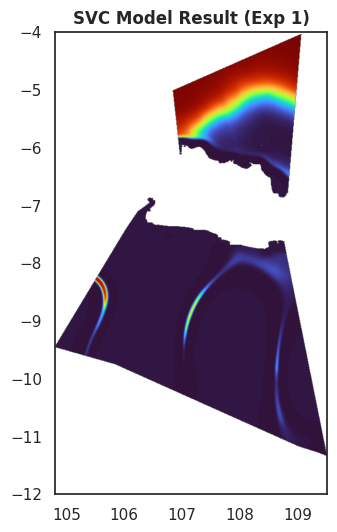

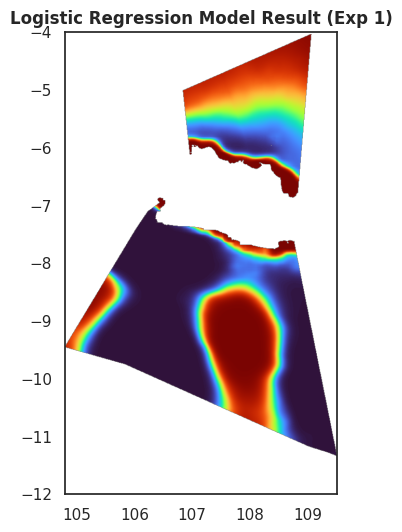

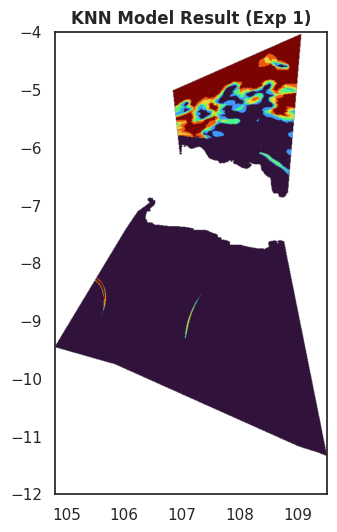

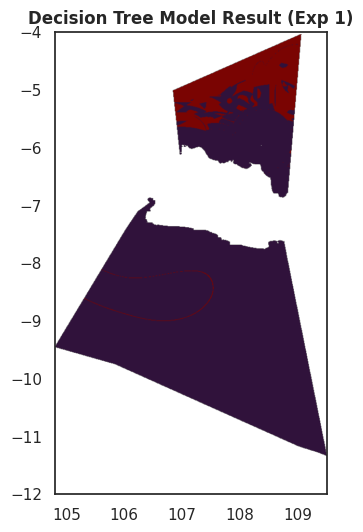

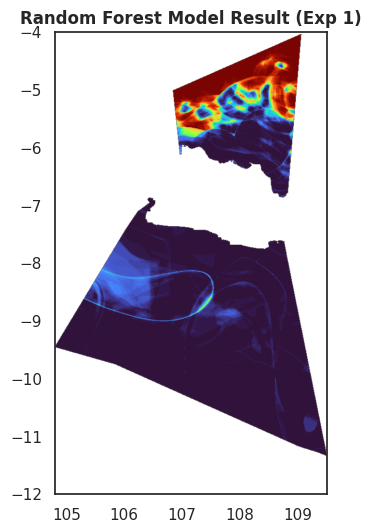

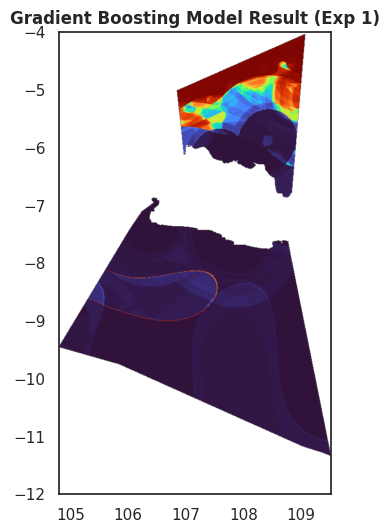

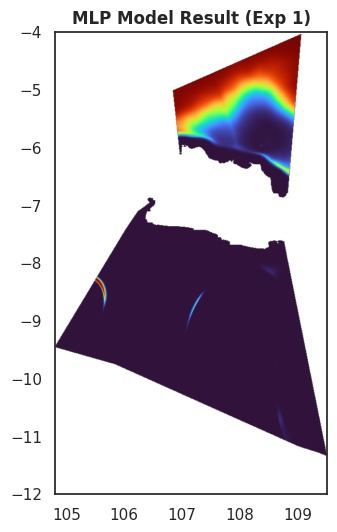

In [28]:
for im in model_names_exp1:
  with rasterio.open(f'{im}_1.tif') as r:
      plt.figure(figsize=(6,6))
      plt.ylim(-12, -4)
      cmap = 'turbo'
      show(r, cmap=cmap, vmin=0, vmax=1, interpolation='bilinear', title=f'{im} Model Result (Exp 1)')
      plt.show()

### 5.2. Experiment 2: Modeling with Reduced Features

**Rationale:** The correlation matrix in our EDA showed that `sst` (Sea Surface Temperature) is highly correlated with many other variables. To reduce multicollinearity and potentially create a more robust and interpretable model, this experiment uses a manually selected subset of features based on domain knowledge and correlation analysis.

#### 5.2.1. Data Preparation

In [29]:
selected_var = ['sst', 'chlo_a', 'reef_dist', 'sal_0', 'sft', 'scv_v100', 'scv_u100']
print("Selected variables for Experiment 2:", selected_var)

# Select features for this experiment
X_2 = sample_clean[selected_var]
y_2 = sample_clean['Label'] # Target remains the same

# Partitioning X and y into train and test
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.25, random_state=42)

# Scaling definition
scaler_2 = MinMaxScaler()

# Fit and transform the scaler on the training data
X_train_scaled_2 = scaler_2.fit_transform(X_train_2)

# Transform the testing data
X_test_scaled_2 = scaler_2.transform(X_test_2)

# Convert the scaled data back to DataFrame
X_train_scaled_df_2 = pd.DataFrame(X_train_scaled_2, columns=X_train_2.columns)
X_test_scaled_df_2 = pd.DataFrame(X_test_scaled_2, columns=X_test_2.columns)

display(X_train_scaled_df_2.head())

Selected variables for Experiment 2: ['sst', 'chlo_a', 'reef_dist', 'sal_0', 'sft', 'scv_v100', 'scv_u100']


sst    chlo_a  reef_dist     sal_0       sft  scv_v100  scv_u100
0  0.611561  0.372282   0.358797  0.643239  0.993327  0.376940  0.999292
1  0.171044  0.145594   0.277438  0.928994  0.517877  0.430438  0.662949
2  0.594040  0.318934   0.220969  0.619812  0.993762  0.376467  0.996755
3  0.615619  0.349621   0.347319  0.642292  0.993427  0.376726  0.999357
4  0.602817  0.391600   0.393271  0.646778  0.993482  0.375041  0.999990

#### 5.2.2. Model Evaluation

### Evaluating SVC... ###

Accuracy: 0.9383
Confusion Matrix:
[[563  45]
 [ 28 547]]


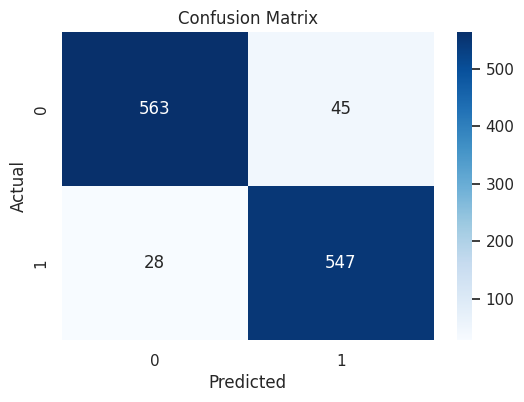

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       608
           1       0.92      0.95      0.94       575

    accuracy                           0.94      1183
   macro avg       0.94      0.94      0.94      1183
weighted avg       0.94      0.94      0.94      1183

AUC: 0.9845


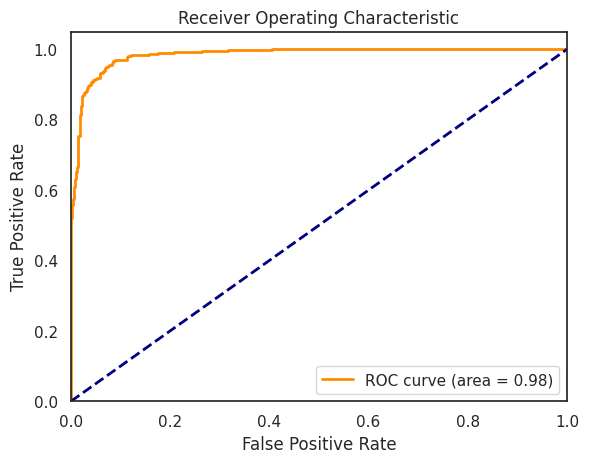

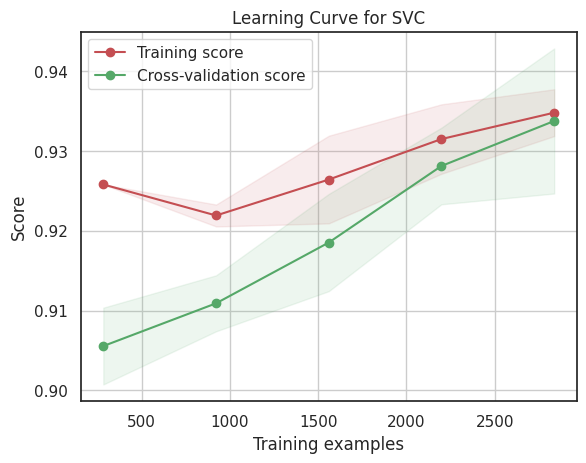


--------------------------------------------------------------------------------

### Evaluating Logistic Regression... ###

Accuracy: 0.7811
Confusion Matrix:
[[468 140]
 [119 456]]


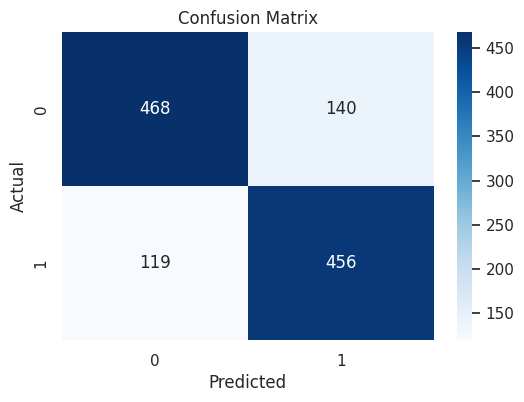

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       608
           1       0.77      0.79      0.78       575

    accuracy                           0.78      1183
   macro avg       0.78      0.78      0.78      1183
weighted avg       0.78      0.78      0.78      1183

AUC: 0.8946


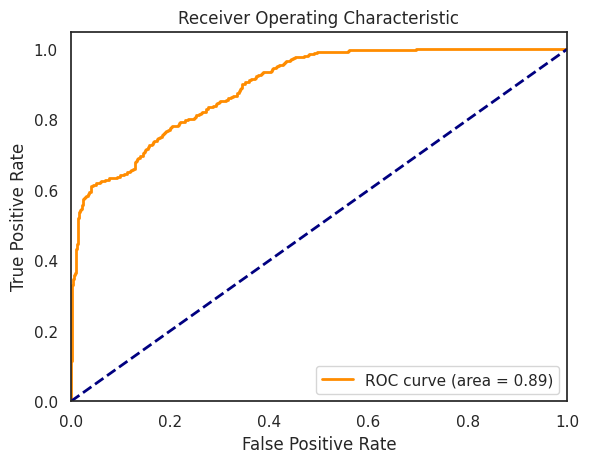


Feature Coefficients (Importance):


Feature  Importance
3      sal_0   12.123179
4        sft    6.828782
6   scv_u100    5.556624
1     chlo_a    4.444690
2  reef_dist    3.461327
5   scv_v100    2.995302
0        sst    2.551897

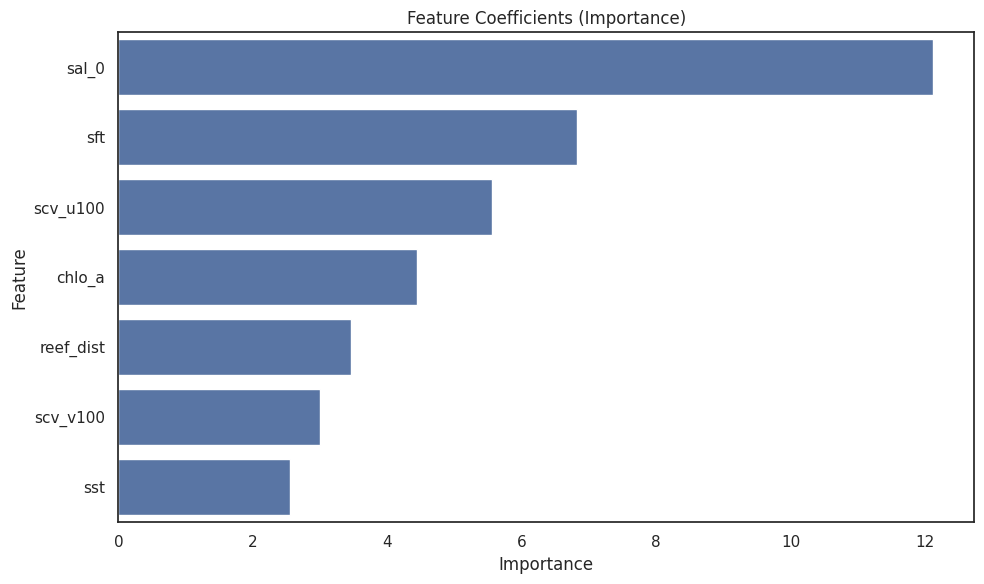

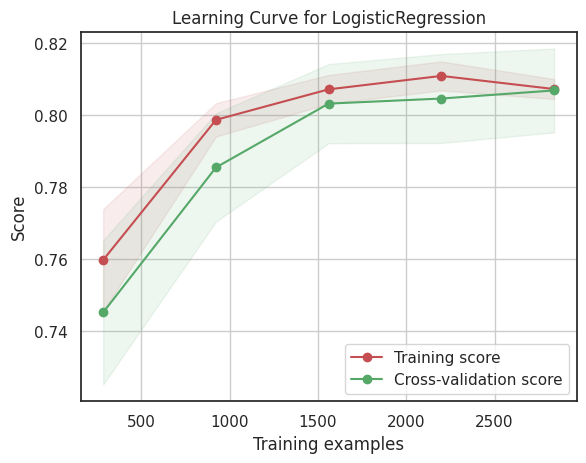


--------------------------------------------------------------------------------

### Evaluating KNN... ###

Accuracy: 0.9763
Confusion Matrix:
[[594  14]
 [ 14 561]]


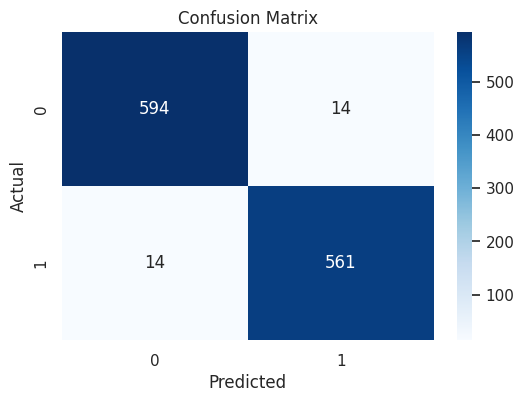

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       608
           1       0.98      0.98      0.98       575

    accuracy                           0.98      1183
   macro avg       0.98      0.98      0.98      1183
weighted avg       0.98      0.98      0.98      1183

AUC: 0.9951


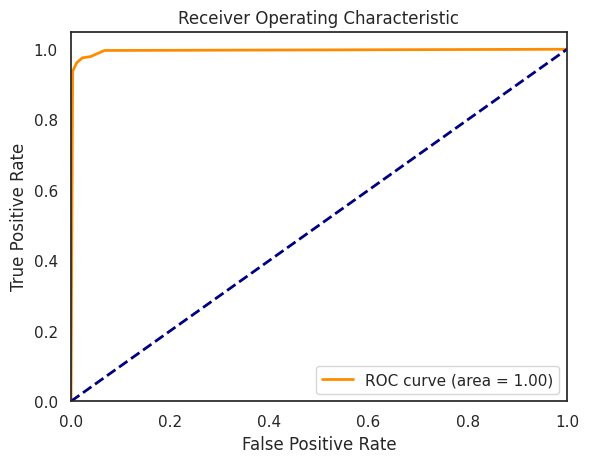

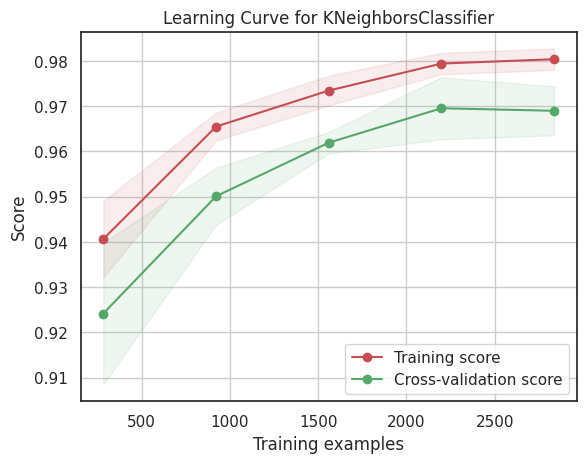


--------------------------------------------------------------------------------

### Evaluating Decision Tree... ###

Accuracy: 0.9814
Confusion Matrix:
[[594  14]
 [  8 567]]


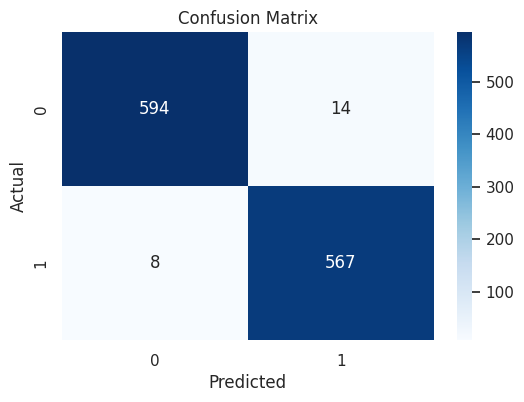

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       608
           1       0.98      0.99      0.98       575

    accuracy                           0.98      1183
   macro avg       0.98      0.98      0.98      1183
weighted avg       0.98      0.98      0.98      1183

AUC: 0.9815


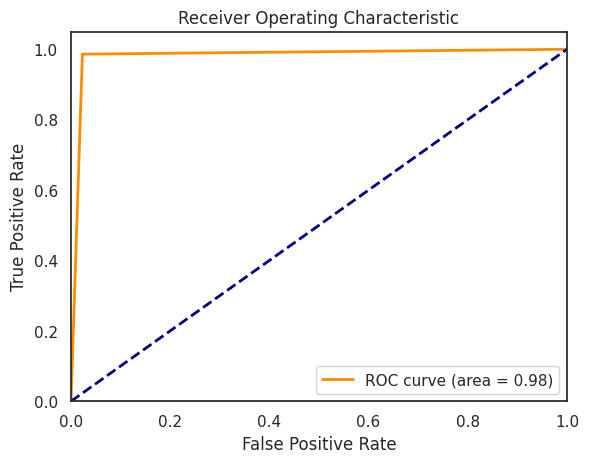


Feature Importance:


Feature  Importance
2  reef_dist    0.413632
3      sal_0    0.294314
5   scv_v100    0.122512
1     chlo_a    0.069514
4        sft    0.068557
6   scv_u100    0.016330
0        sst    0.015141

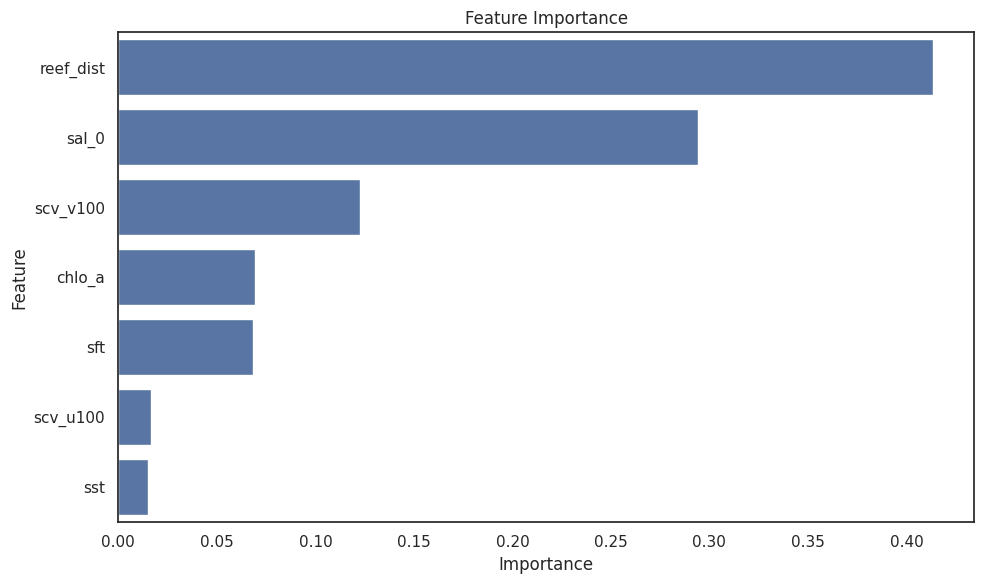

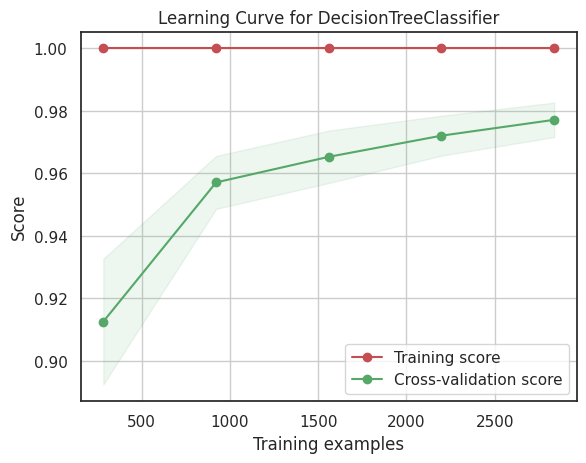


--------------------------------------------------------------------------------

### Evaluating Random Forest... ###

Accuracy: 0.9890
Confusion Matrix:
[[603   5]
 [  8 567]]


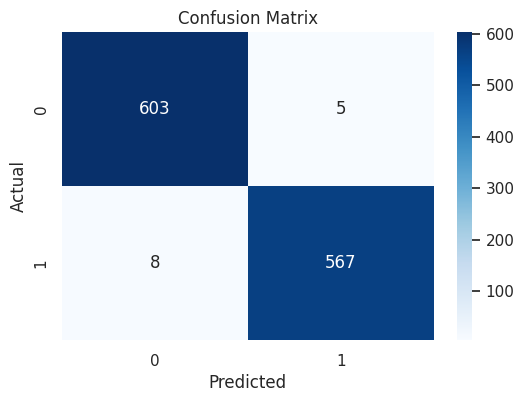

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       608
           1       0.99      0.99      0.99       575

    accuracy                           0.99      1183
   macro avg       0.99      0.99      0.99      1183
weighted avg       0.99      0.99      0.99      1183

AUC: 0.9992


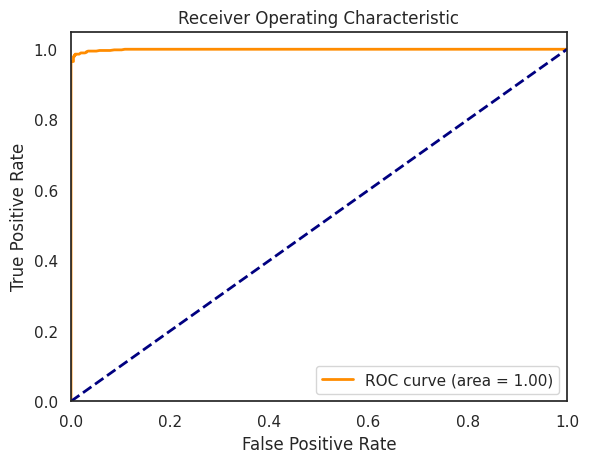


Feature Importance:


Feature  Importance
2  reef_dist    0.275197
3      sal_0    0.198386
5   scv_v100    0.168105
1     chlo_a    0.154196
4        sft    0.100351
6   scv_u100    0.059659
0        sst    0.044106

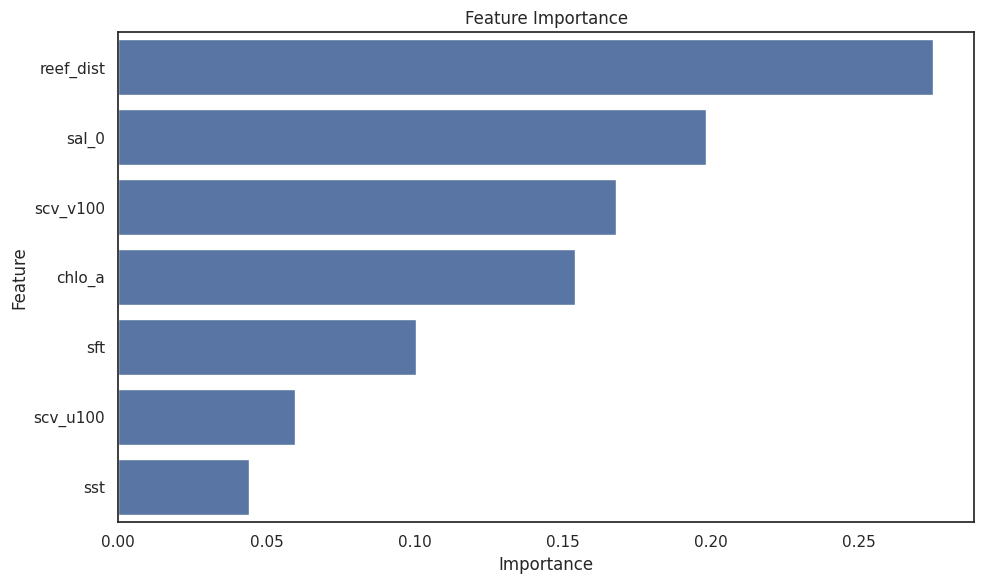

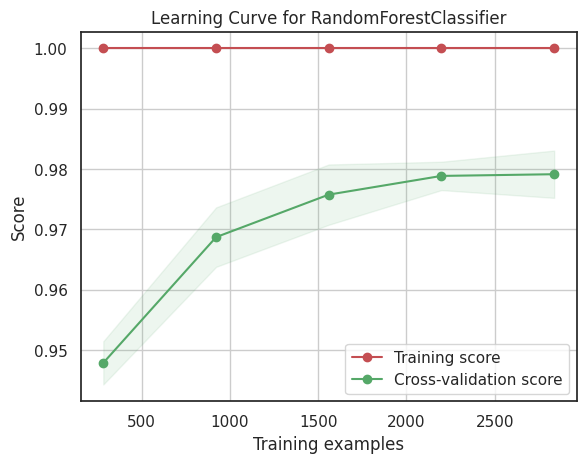


--------------------------------------------------------------------------------

### Evaluating Gradient Boosting... ###

Accuracy: 0.9746
Confusion Matrix:
[[591  17]
 [ 13 562]]


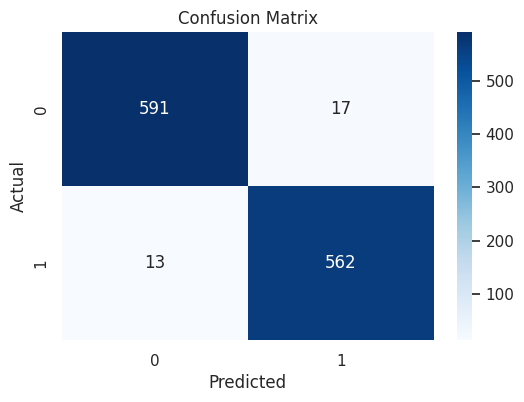

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       608
           1       0.97      0.98      0.97       575

    accuracy                           0.97      1183
   macro avg       0.97      0.97      0.97      1183
weighted avg       0.97      0.97      0.97      1183

AUC: 0.9979


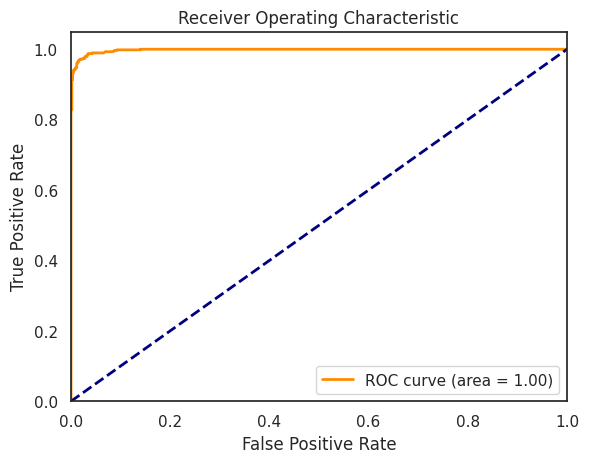


Feature Importance:


Feature  Importance
5   scv_v100    0.345853
2  reef_dist    0.295860
3      sal_0    0.224976
6   scv_u100    0.051073
1     chlo_a    0.046710
4        sft    0.031596
0        sst    0.003932

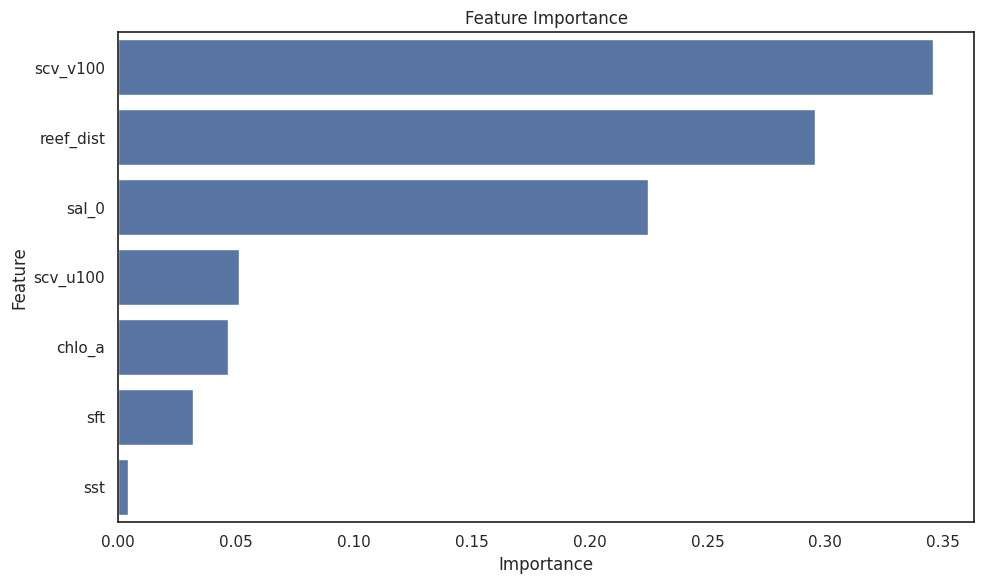

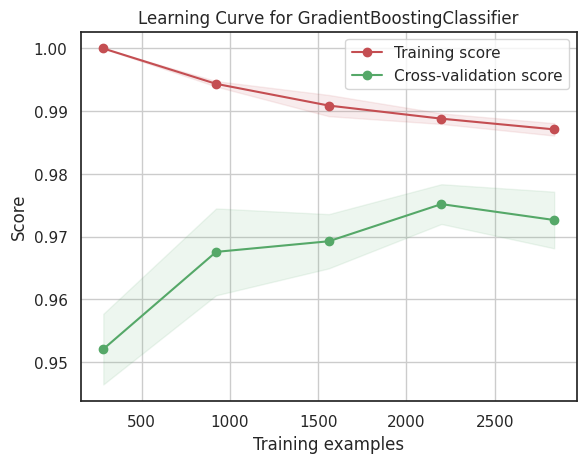


--------------------------------------------------------------------------------

### Evaluating MLP... ###

Accuracy: 0.9493
Confusion Matrix:
[[575  33]
 [ 27 548]]


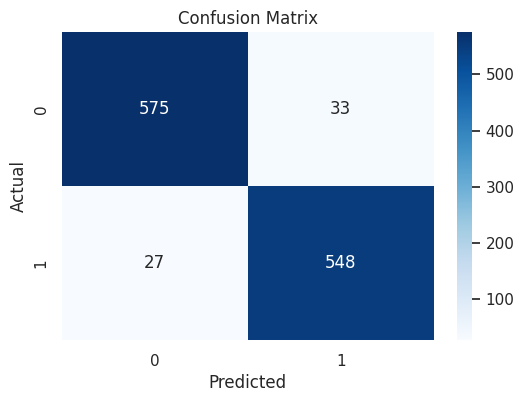

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95       608
           1       0.94      0.95      0.95       575

    accuracy                           0.95      1183
   macro avg       0.95      0.95      0.95      1183
weighted avg       0.95      0.95      0.95      1183

AUC: 0.9900


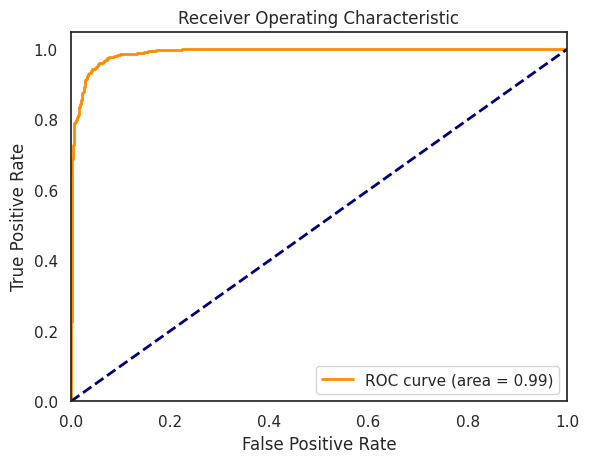

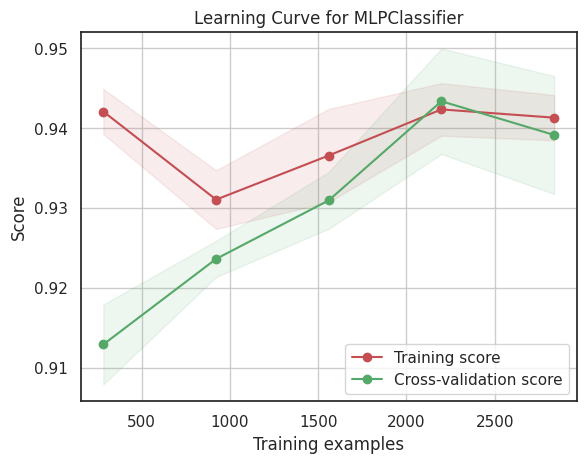


--------------------------------------------------------------------------------



In [30]:
# Evaluate each model with the reduced feature set
for model_name, model in models.items():
    print(f"### Evaluating {model_name}... ###\n")
    evaluate_model(model, X_train_scaled_df_2, y_train_2, X_test_scaled_df_2, y_test_2, cv=5)
    print("\n" + "-"*80 + "\n")

#### 5.2.3. Prediction and Spatialization

In [31]:
# Prepare the variable data with selected features
variable_only_2 = variable[selected_var]

# Scale the data using the scaler from this experiment
variable_scaled_2 = scaler_2.transform(variable_only_2)
variable_scaled_df_2 = pd.DataFrame(variable_scaled_2, columns=variable_only_2.columns)

# Predict using each model
predicted_df_2 = pd.DataFrame()
for model_name, model in models.items():
    print(f"Predicting with {model_name}...")
    predictions = model.predict_proba(variable_scaled_df_2)[:, 1]
    predicted_df_2[model_name] = predictions

# Merge with x and y coordinates
predicted_df_2 = pd.concat([predicted_df_2, variable[['x', 'y']]], axis=1)
display(predicted_df_2.head())

Predicting with SVC...
Predicting with Logistic Regression...
Predicting with KNN...
Predicting with Decision Tree...
Predicting with Random Forest...
Predicting with Gradient Boosting...
Predicting with MLP...


SVC  Logistic Regression  KNN  Decision Tree  Random Forest  \
0  0.999995             0.929836  1.0            1.0            1.0   
1  0.999995             0.929858  1.0            1.0            1.0   
2  0.999994             0.928268  1.0            1.0            1.0   
3  0.999995             0.928685  1.0            1.0            1.0   
4  0.999995             0.929116  1.0            1.0            1.0   

   Gradient Boosting       MLP           x         y  
0           0.987396  0.999417  109.059967 -4.046910  
1           0.987396  0.999425  109.068950 -4.046910  
2           0.987396  0.999338  109.033018 -4.055894  
3           0.987396  0.999355  109.042001 -4.055894  
4           0.987396  0.999372  109.050984 -4.055894

In [32]:
arr_2 = geodf_to_raster(predicted_df_2)

# Apply CRS to xarray dataset and export to .tif
model_names_exp2 = predicted_df_2.drop(['x', 'y'], axis=1).columns
for model_name in model_names_exp2:
  arr_2[model_name].rio.set_crs(crs).rio.to_raster(f'{model_name}_2.tif', resolution=1000)
print("Raster files for Experiment 2 created successfully.")

Raster files for Experiment 2 created successfully.


#### 5.2.4. Visualization of Results

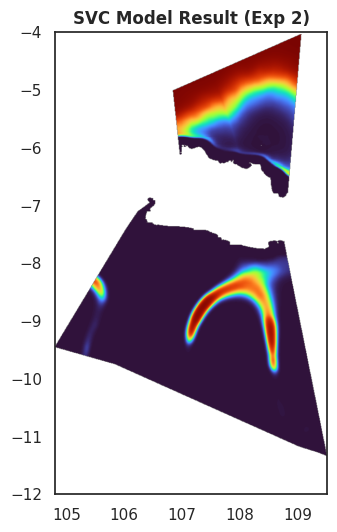

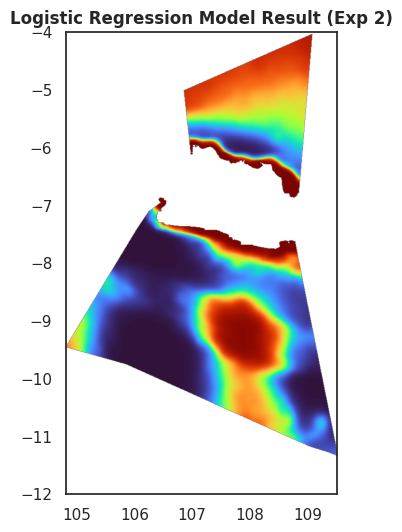

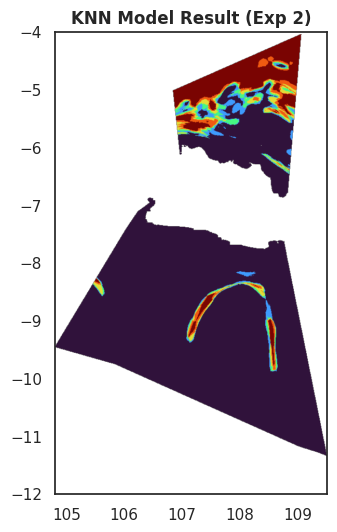

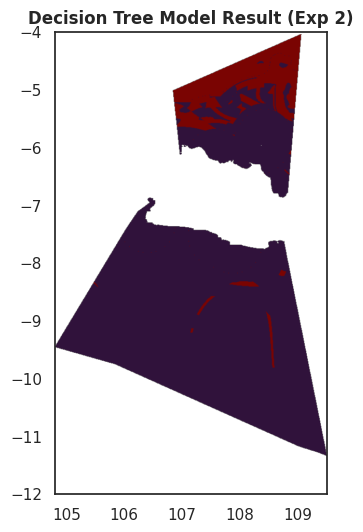

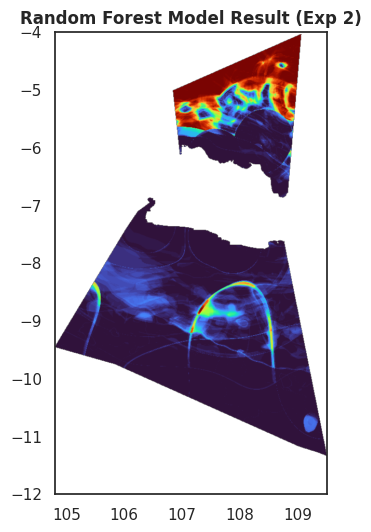

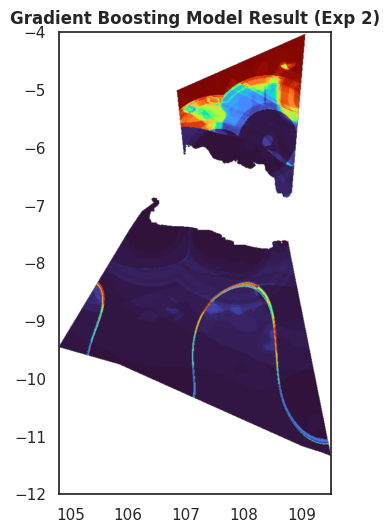

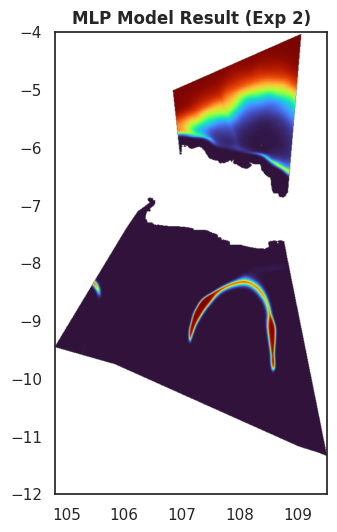

In [33]:
for im in model_names_exp2:
  # Corrected file name to match what was saved
  with rasterio.open(f'{im}_2.tif') as r:
      plt.figure(figsize=(6,6))
      plt.ylim(-12, -4)
      cmap = 'turbo'
      show(r, cmap=cmap, vmin=0, vmax=1, interpolation='bilinear', title=f'{im} Model Result (Exp 2)')
      plt.show()

### 5.3. Experiment 3: Weighted Averaging Ensemble

**Rationale:** Instead of relying on a single model, an ensemble can often produce more robust predictions. In this experiment, we create a simple ensemble by taking a weighted average of the predictions from three of our top-performing or most stable models from Experiment 1 (Logistic Regression, SVC, and Gradient Boosting). The weights are assigned based on a heuristic understanding of model performance and stability.

#### 5.3.1. Implementation and Evaluation

We use the models trained in Experiment 1 (with all features) to make predictions on the test set. We then combine these predictions using our defined weights to get a final prediction and evaluate its accuracy.

In [35]:
# Note: This experiment uses the models trained on all features from Experiment 1
# We will use the original X_train_scaled_df, y_train, X_test_scaled_df, y_test

# Define weights for selected models
weight_lr = 0.7
weight_svc = 0.2
weight_gb = 0.1

# Models were already fitted in Experiment 1. We'll use them to predict on the test set.
lr_pred = models['Logistic Regression'].predict(X_test_scaled_df_2)
svc_pred = models['SVC'].predict(X_test_scaled_df_2)
gb_pred = models['Gradient Boosting'].predict(X_test_scaled_df_2)

# Combine the weighted predictions
weighted_pred = (weight_lr * lr_pred + weight_svc * svc_pred + weight_gb * gb_pred)

# Convert weighted scores to binary predictions (0 or 1)
final_weighted_pred = (weighted_pred >= 0.5).astype(int)

accuracy = accuracy_score(y_test, final_weighted_pred)
print(f"Weighted Averaging Accuracy on Test Set: {accuracy:.4f}")
print("\nClassification Report for Weighted Average:")
print(classification_report(y_test, final_weighted_pred))

Weighted Averaging Accuracy on Test Set: 0.7811

Classification Report for Weighted Average:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78       608
           1       0.77      0.79      0.78       575

    accuracy                           0.78      1183
   macro avg       0.78      0.78      0.78      1183
weighted avg       0.78      0.78      0.78      1183



#### 5.3.2. Prediction and Spatialization

In [37]:
# Make probabilistic predictions on the full 'variable' dataset
# We use the scaled data from Experiment 1 (variable_scaled_df)
lr_pred_new_data = models['Logistic Regression'].predict_proba(variable_scaled_df_2)
svc_pred_new_data = models['SVC'].predict_proba(variable_scaled_df_2)
gb_pred_new_data = models['Gradient Boosting'].predict_proba(variable_scaled_df_2)

# Combine the weighted predictions
weighted_pred_new_data = (weight_lr*lr_pred_new_data + weight_svc*svc_pred_new_data + weight_gb*gb_pred_new_data)

# We only take the probability for label 1
wa_prob = weighted_pred_new_data[:, 1]

# Turn it into a dataframe with x and y coordinates
predicted_df_3 = pd.DataFrame(wa_prob, columns=['prob_weighted_avg'])
predicted_df_3[['x', 'y']] = variable[['x', 'y']]
display(predicted_df_3.head())

prob_weighted_avg           x         y
0           0.949624  109.059967 -4.046910
1           0.949639  109.068950 -4.046910
2           0.948526  109.033018 -4.055894
3           0.948818  109.042001 -4.055894
4           0.949120  109.050984 -4.055894

In [38]:
arr_3 = geodf_to_raster(predicted_df_3)

# Apply CRS and export
arr_3['prob_weighted_avg'].rio.set_crs(crs).rio.to_raster('weighted_averaging_3.tif', resolution=1000)
print("Raster file for Experiment 3 created successfully.")

Raster file for Experiment 3 created successfully.


#### 5.3.3. Visualization of Results

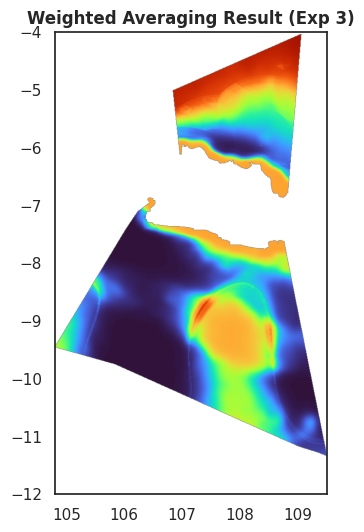

In [39]:
with rasterio.open('weighted_averaging_3.tif') as r:
    plt.figure(figsize=(6,6))
    plt.ylim(-12, -4)
    cmap = 'turbo'
    show(r, cmap=cmap, vmin=0, vmax=1, interpolation='bilinear', title='Weighted Averaging Result (Exp 3)')
    plt.show()

### 5.4. Experiment 4: Reducing Variables and Feature Engineering (Key Experiment)

**Rationale:** This is our most important experiment. The results from the baseline model were heavily influenced by variables like sea current velocity and distance to reef, while key oceanographic indicators like Sea Surface Temperature (SST) and Chlorophyll-a (a proxy for phytoplankton) had less impact than expected.

To address this, we perform **feature engineering**. We create a new interaction feature, `sst_chlo_a`, to capture the combined effect of temperature and food availability. We also strategically drop several variables (sea currents, salinity, reef distance) to force the model to learn from the more fundamental oceanographic features (`sst`, `chlo_a`, `sft`) and our new engineered feature. We also switch to `StandardScaler` as it is often preferred for models that assume normally distributed features.

> **Note:** The model resulting from this experiment is the one selected for our final analysis and deployment.

#### 5.4.1. Feature Engineering and Data Preparation

In [40]:
# Create the function for Feature Engineering
def feature_eng(df):
    df_eng = df.copy()
    df_eng['sst_chlo_a'] = df_eng['sst'] * df_eng['chlo_a']

    # Define columns to exclude to simplify the model
    excluded_var = ['reef_dist', 'sal_0', 'scv_v200', 'scv_v0', 'scv_v100', 'scv_u200', 'scv_u0', 'scv_u100', 'sse']
    df_eng = df_eng.drop(excluded_var, axis=1)
    return df_eng

# Apply the function to the clean sample data
sample_clean_4 = feature_eng(sample_clean)
print("Columns in the engineered training data:")
print(sample_clean_4.columns)

# Apply the function to the full variable data
variable_4 = feature_eng(variable).drop(['x', 'y'], axis=1, errors='ignore')
print("\nColumns in the engineered prediction data:")
print(variable_4.columns)

Columns in the engineered training data:
Index(['Label', 'sst', 'chlo_a', 'sal_100', 'sal_200', 'sft', 'sst_chlo_a'], dtype='object')

Columns in the engineered prediction data:
Index(['sst', 'chlo_a', 'sal_100', 'sal_200', 'sft', 'sst_chlo_a'], dtype='object')


In [41]:
# Split the data into feature (X) and target (y)
X_4 = sample_clean_4.drop('Label', axis=1)
y_4 = sample_clean_4['Label']

# Partitioning into train and test
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.25, random_state=42)

# Scaling definition (Using StandardScaler this time)
scaler_4 = StandardScaler()

# Fit and transform the scaler on the training data
X_train_scaled_4 = scaler_4.fit_transform(X_train_4)

# Transform the testing data
X_test_scaled_4 = scaler_4.transform(X_test_4)

# Convert the scaled data back to DataFrame
X_train_scaled_df_4 = pd.DataFrame(X_train_scaled_4, columns=X_train_4.columns)
X_test_scaled_df_4 = pd.DataFrame(X_test_scaled_4, columns=X_test_4.columns)

display(X_train_scaled_df_4.describe())

sst        chlo_a       sal_100       sal_200           sft  \
count  3.547000e+03  3.547000e+03  3.547000e+03  3.547000e+03  3.547000e+03   
mean   1.472368e-15  3.846186e-16  1.061707e-16 -2.203544e-17  1.602577e-17   
std    1.000141e+00  1.000141e+00  1.000141e+00  1.000141e+00  1.000141e+00   
min   -2.019881e+00 -1.442256e+00 -7.855974e-01 -7.727253e-01 -2.641167e+00   
25%   -1.172826e+00 -8.747447e-01 -7.855974e-01 -7.727253e-01 -7.021790e-01   
50%    6.806502e-01  1.776756e-02 -7.847067e-01 -7.727253e-01  6.680306e-01   
75%    7.417576e-01  4.567584e-01  1.306994e+00  1.321545e+00  6.762018e-01   
max    2.427248e+00  2.442782e+00  1.314472e+00  1.332415e+00  6.890670e-01   

         sst_chlo_a  
count  3.547000e+03  
mean   3.966379e-16  
std    1.000141e+00  
min   -1.442201e+00  
25%   -9.105601e-01  
50%    4.270356e-02  
75%    4.652716e-01  
max    2.556557e+00

#### 5.4.2. Model Evaluation

### Evaluating SVC... ###

Accuracy: 0.7785
Confusion Matrix:
[[394 214]
 [ 48 527]]


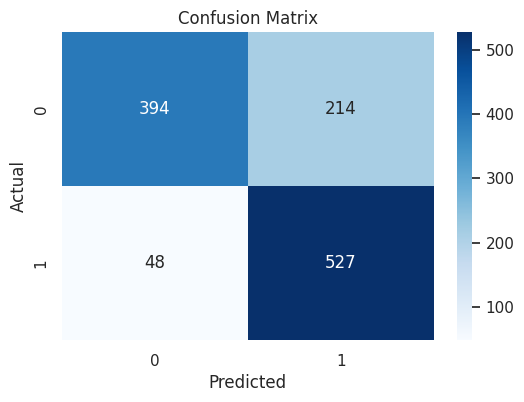

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.65      0.75       608
           1       0.71      0.92      0.80       575

    accuracy                           0.78      1183
   macro avg       0.80      0.78      0.78      1183
weighted avg       0.80      0.78      0.77      1183

AUC: 0.8508


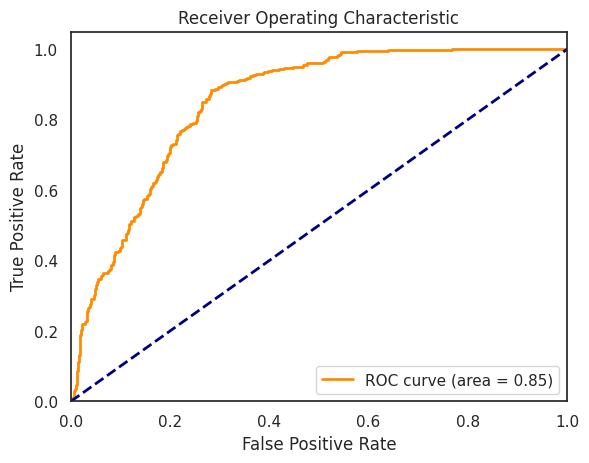

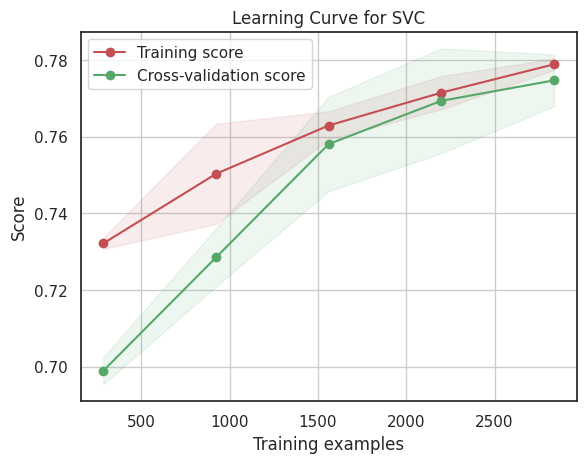


--------------------------------------------------------------------------------

### Evaluating Logistic Regression... ###

Accuracy: 0.6644
Confusion Matrix:
[[308 300]
 [ 97 478]]


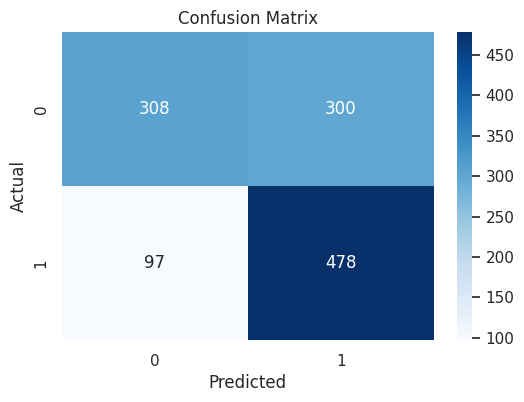

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.51      0.61       608
           1       0.61      0.83      0.71       575

    accuracy                           0.66      1183
   macro avg       0.69      0.67      0.66      1183
weighted avg       0.69      0.66      0.66      1183

AUC: 0.6248


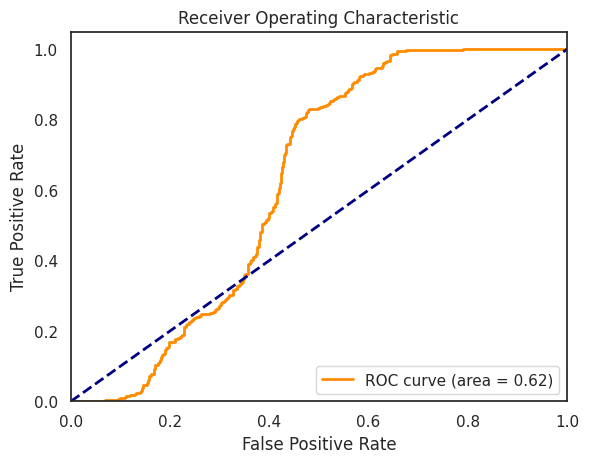


Feature Coefficients (Importance):


Feature  Importance
2     sal_100    3.524378
3     sal_200    3.267178
4         sft    1.994960
1      chlo_a    1.825916
5  sst_chlo_a    1.251277
0         sst    1.097320

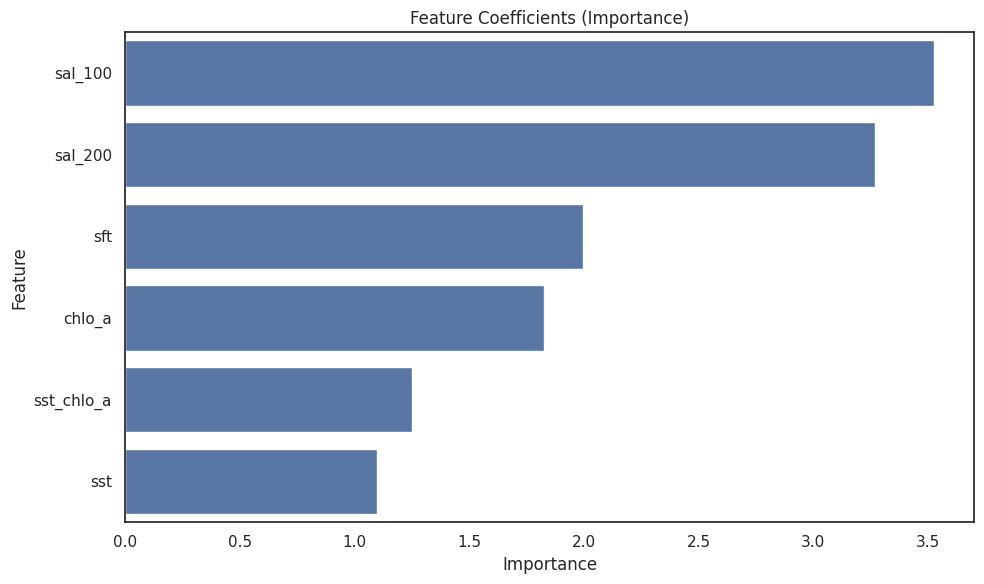

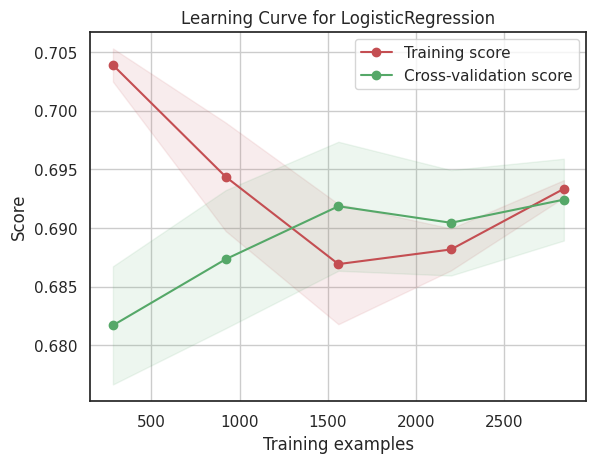


--------------------------------------------------------------------------------

### Evaluating KNN... ###

Accuracy: 0.9011
Confusion Matrix:
[[522  86]
 [ 31 544]]


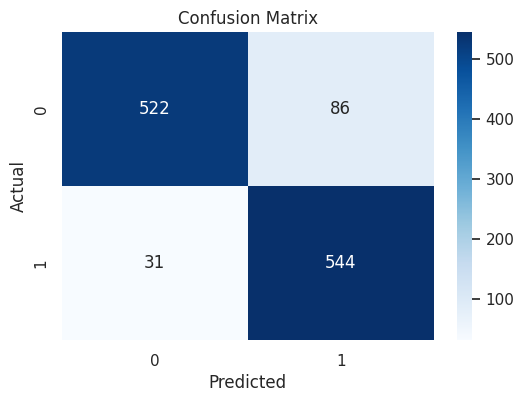

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       608
           1       0.86      0.95      0.90       575

    accuracy                           0.90      1183
   macro avg       0.90      0.90      0.90      1183
weighted avg       0.90      0.90      0.90      1183

AUC: 0.9578


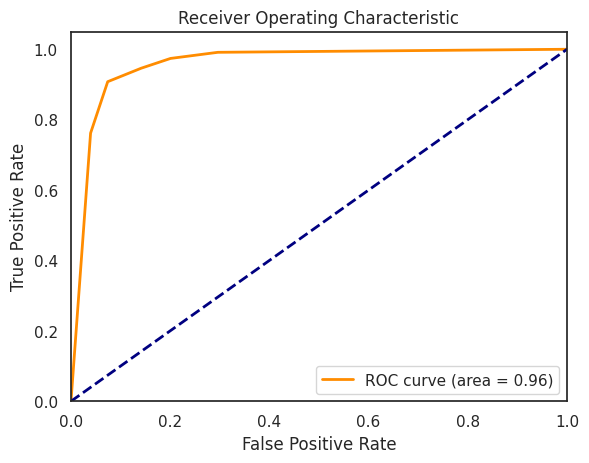

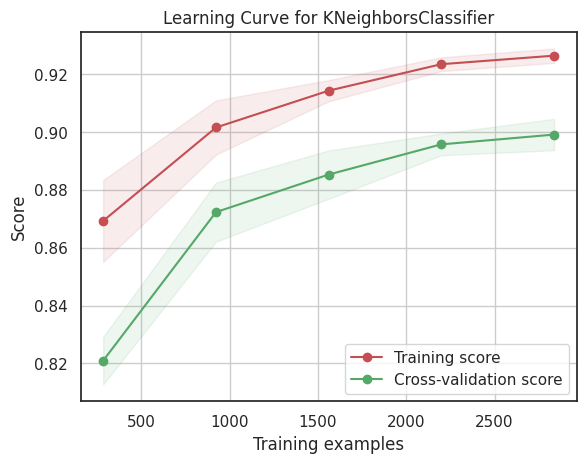


--------------------------------------------------------------------------------

### Evaluating Decision Tree... ###

Accuracy: 0.9451
Confusion Matrix:
[[567  41]
 [ 24 551]]


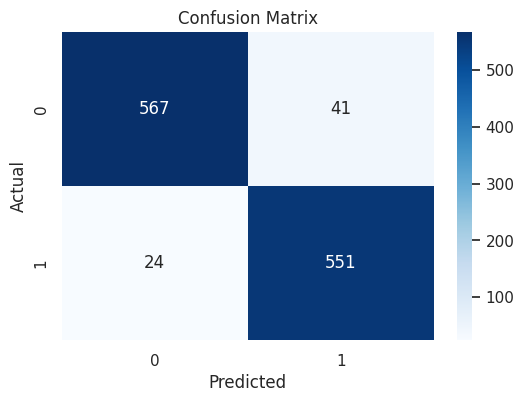

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.93      0.95       608
           1       0.93      0.96      0.94       575

    accuracy                           0.95      1183
   macro avg       0.95      0.95      0.95      1183
weighted avg       0.95      0.95      0.95      1183

AUC: 0.9454


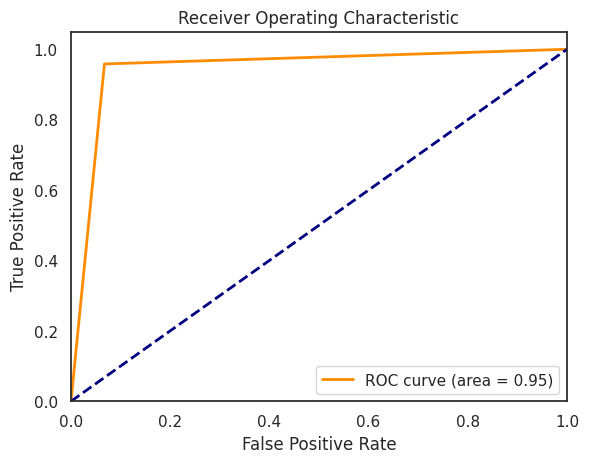


Feature Importance:


Feature  Importance
1      chlo_a    0.440148
4         sft    0.252454
2     sal_100    0.163106
0         sst    0.064295
5  sst_chlo_a    0.056939
3     sal_200    0.023058

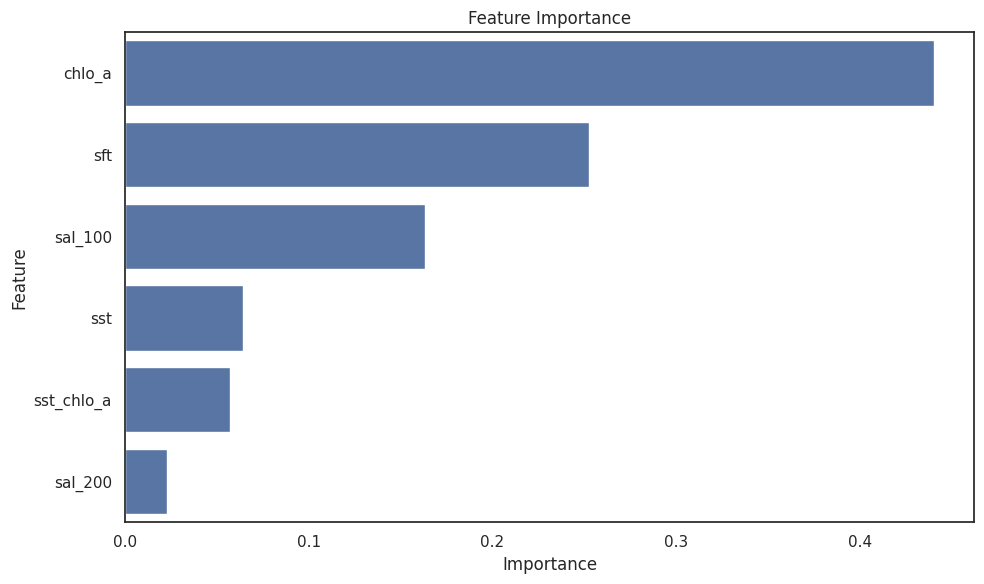

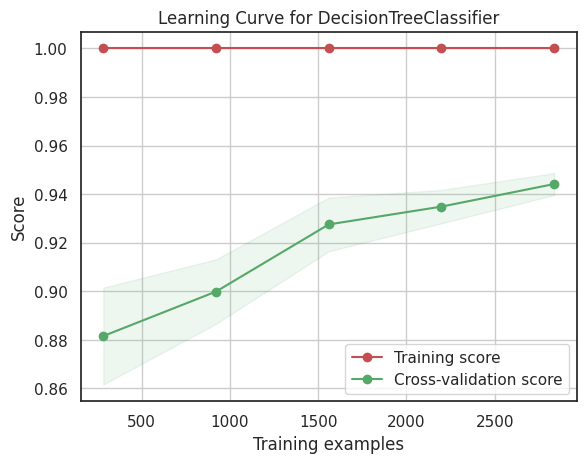


--------------------------------------------------------------------------------

### Evaluating Random Forest... ###

Accuracy: 0.9594
Confusion Matrix:
[[584  24]
 [ 24 551]]


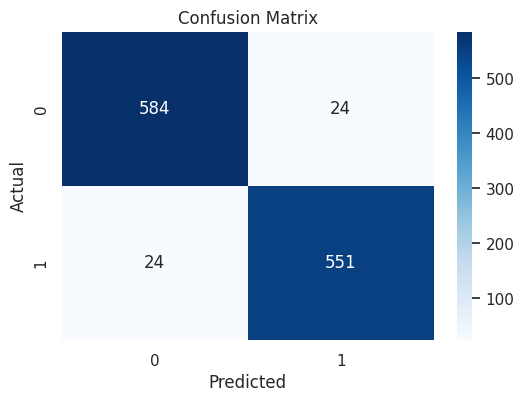

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       608
           1       0.96      0.96      0.96       575

    accuracy                           0.96      1183
   macro avg       0.96      0.96      0.96      1183
weighted avg       0.96      0.96      0.96      1183

AUC: 0.9912


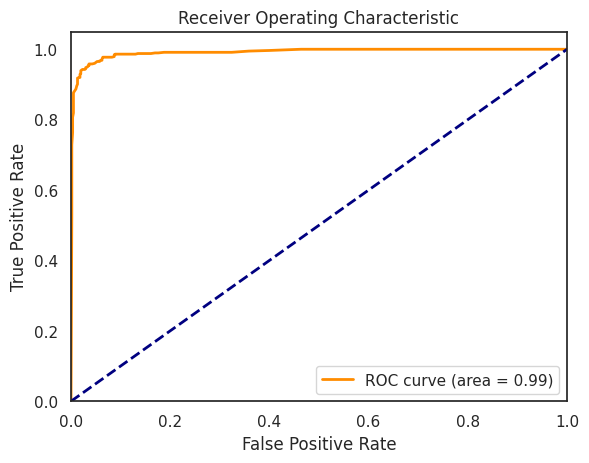


Feature Importance:


Feature  Importance
4         sft    0.269743
1      chlo_a    0.226971
5  sst_chlo_a    0.225540
0         sst    0.117116
2     sal_100    0.101167
3     sal_200    0.059462

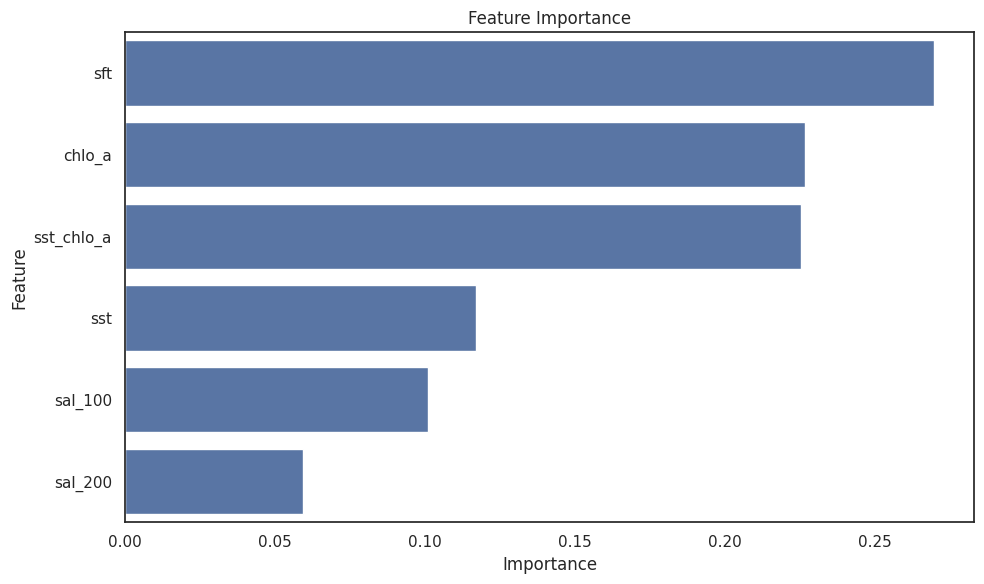

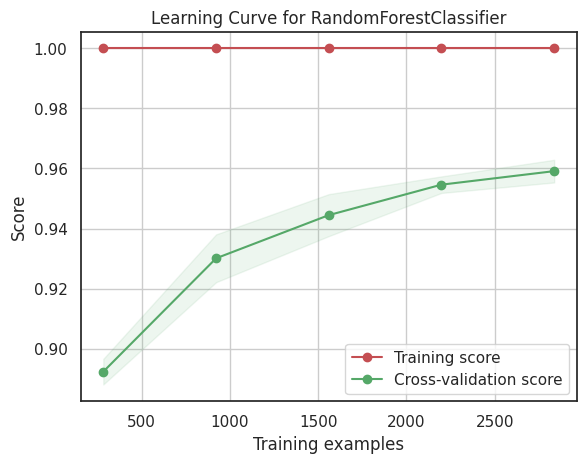


--------------------------------------------------------------------------------

### Evaluating Gradient Boosting... ###

Accuracy: 0.9358
Confusion Matrix:
[[557  51]
 [ 25 550]]


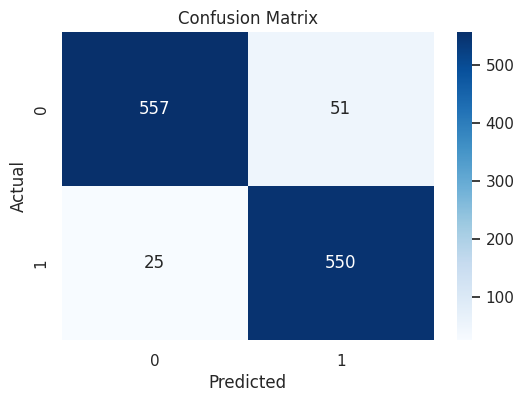

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       608
           1       0.92      0.96      0.94       575

    accuracy                           0.94      1183
   macro avg       0.94      0.94      0.94      1183
weighted avg       0.94      0.94      0.94      1183

AUC: 0.9816


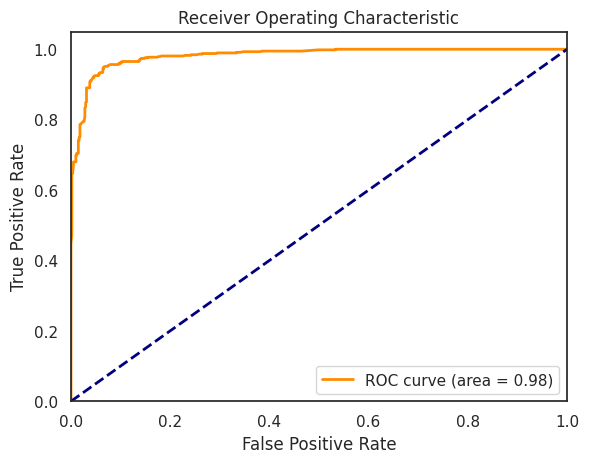


Feature Importance:


Feature  Importance
1      chlo_a    0.414862
4         sft    0.303170
2     sal_100    0.098662
5  sst_chlo_a    0.096805
3     sal_200    0.047710
0         sst    0.038790

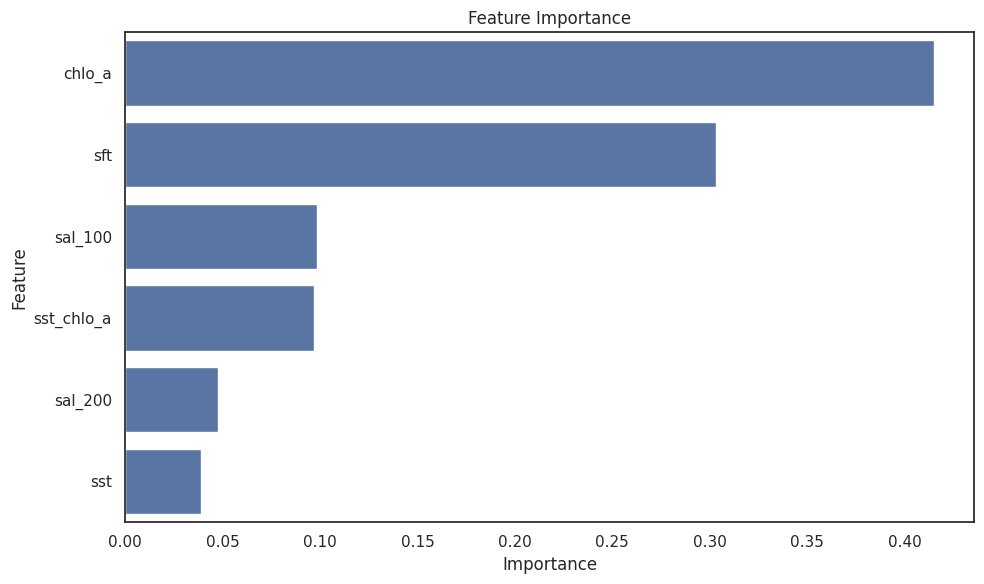

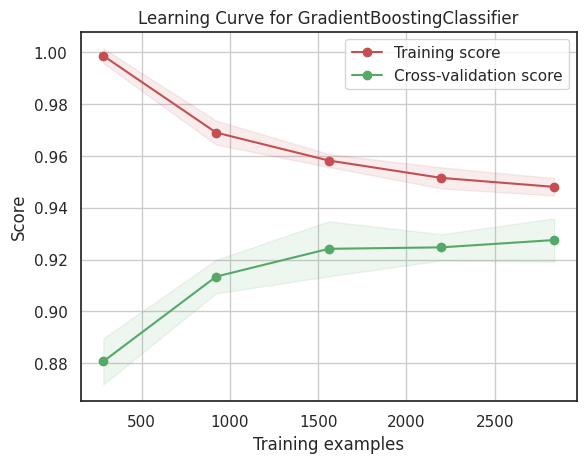


--------------------------------------------------------------------------------

### Evaluating MLP... ###

Accuracy: 0.8402
Confusion Matrix:
[[458 150]
 [ 39 536]]


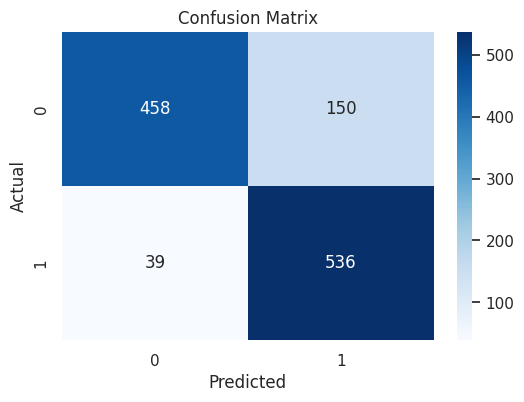

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83       608
           1       0.78      0.93      0.85       575

    accuracy                           0.84      1183
   macro avg       0.85      0.84      0.84      1183
weighted avg       0.85      0.84      0.84      1183

AUC: 0.9026


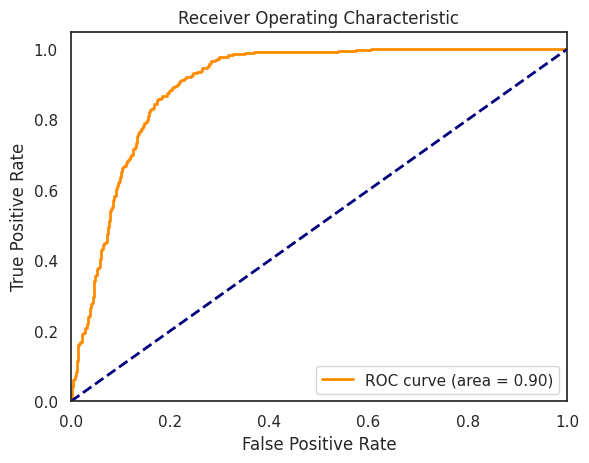

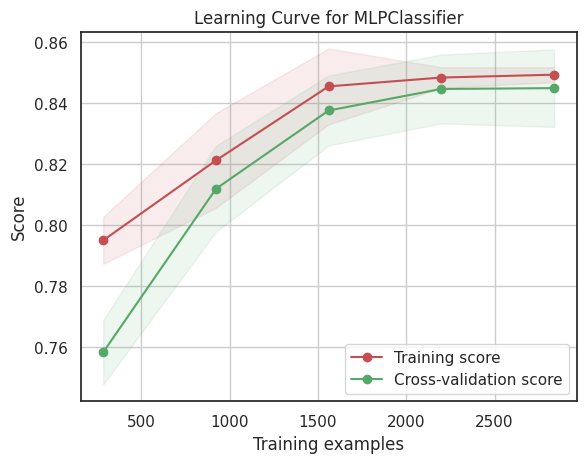


--------------------------------------------------------------------------------



In [42]:
# Evaluate each model with the engineered feature set
for model_name, model in models.items():
    print(f"### Evaluating {model_name}... ###\n")
    evaluate_model(model, X_train_scaled_df_4, y_train_4, X_test_scaled_df_4, y_test_4, cv=5)
    print("\n" + "-"*80 + "\n")

#### 5.4.3. Prediction and Spatialization

In [43]:
# Scale the engineered 'variable' data
variable_scaled_4 = scaler_4.transform(variable_4)
variable_scaled_df_4 = pd.DataFrame(variable_scaled_4, columns=variable_4.columns)

# Predict using each model
predicted_df_4 = pd.DataFrame()
for model_name, model in models.items():
    print(f"Predicting with {model_name}...")
    predictions = model.predict_proba(variable_scaled_df_4)[:, 1]
    predicted_df_4[model_name] = predictions

# Merge with x and y coordinates
predicted_df_4 = pd.concat([predicted_df_4, variable[['x', 'y']]], axis=1)
display(predicted_df_4.head())

Predicting with SVC...
Predicting with Logistic Regression...
Predicting with KNN...
Predicting with Decision Tree...
Predicting with Random Forest...
Predicting with Gradient Boosting...
Predicting with MLP...


SVC  Logistic Regression  KNN  Decision Tree  Random Forest  \
0  0.767613             0.662769  0.6            1.0           0.94   
1  0.764897             0.662699  0.8            1.0           0.93   
2  0.762309             0.663786  0.8            1.0           0.97   
3  0.765174             0.663477  1.0            1.0           0.96   
4  0.768111             0.663109  0.8            1.0           0.94   

   Gradient Boosting       MLP           x         y  
0           0.951717  0.838843  109.059967 -4.046910  
1           0.951717  0.835320  109.068950 -4.046910  
2           0.951717  0.835235  109.033018 -4.055894  
3           0.951717  0.837839  109.042001 -4.055894  
4           0.951717  0.840389  109.050984 -4.055894

In [44]:
arr_4 = geodf_to_raster(predicted_df_4)

# Apply CRS to xarray dataset and export to .tif
model_names_exp4 = predicted_df_4.drop(['x', 'y'], axis=1).columns
for model_name in model_names_exp4:
  arr_4[model_name].rio.set_crs(crs).rio.to_raster(f'{model_name}_4.tif', resolution=1000)
print("Raster files for Experiment 4 created successfully.")

Raster files for Experiment 4 created successfully.


#### 5.4.4. Visualization of Results

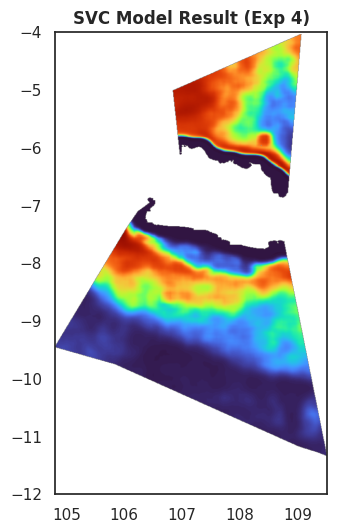

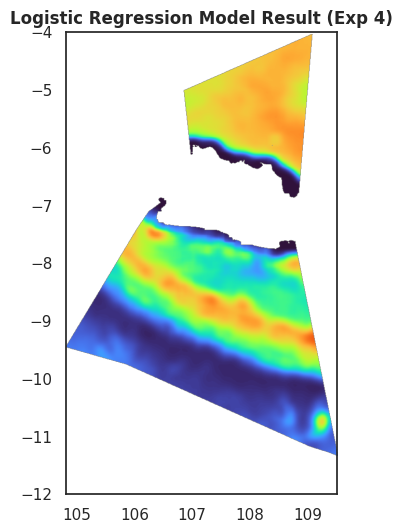

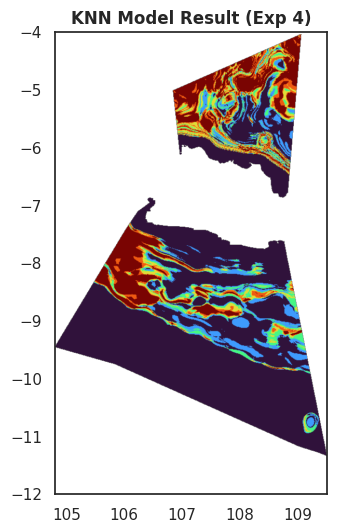

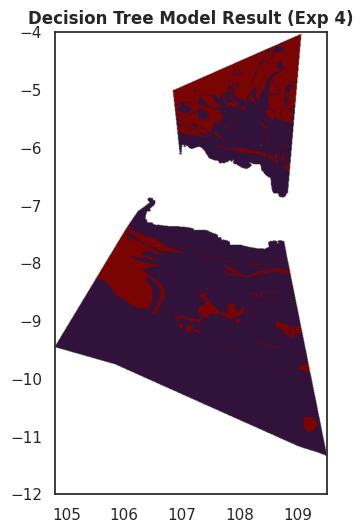

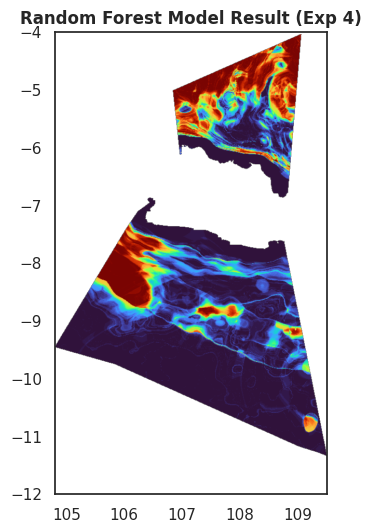

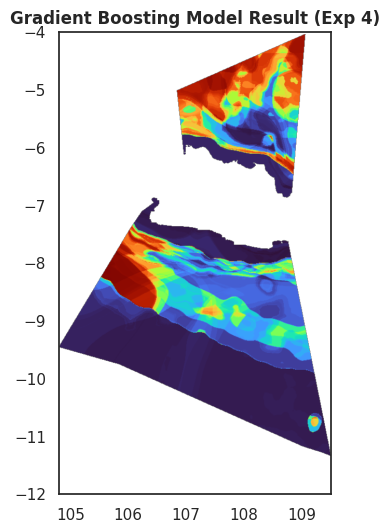

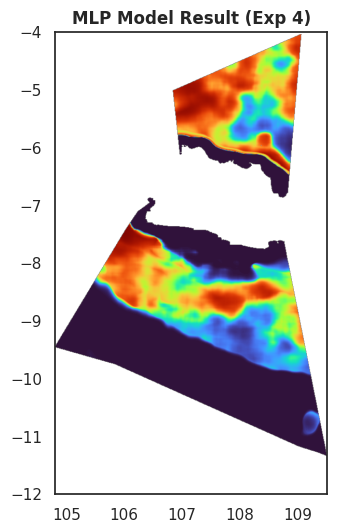

In [45]:
for im in model_names_exp4:
  with rasterio.open(f'{im}_4.tif') as r:
      plt.figure(figsize=(6,6))
      plt.ylim(-12, -4)
      cmap = 'turbo'
      show(r, cmap=cmap, vmin=0, vmax=1, interpolation='bilinear', title=f'{im} Model Result (Exp 4)')
      plt.show()

### 5.5. Experiment 5: Simple Stacking Ensemble

**Rationale:** Stacking is a more advanced ensemble technique where the predictions of several base models are used as input features for a final `meta-model`. This allows the meta-model to learn how to best combine the predictions from the base learners. We use KNN and Random Forest as our base learners and an MLP (Neural Network) as our meta-model, using the feature-engineered data from Experiment 4.

#### 5.5.1. Implementation and Evaluation

In [46]:
# Note: This experiment uses the data from Experiment 4
# X_train_scaled_df_4, y_train_4, X_test_scaled_df_4, y_test_4

# 1. Train base models
knn = models['KNN']
rf = models['Random Forest']

knn.fit(X_train_scaled_df_4, y_train_4)
rf.fit(X_train_scaled_df_4, y_train_4)

# 2. Generate predictions on the training set to create features for the meta-model
knn_pred_train = knn.predict(X_train_scaled_df_4)
rf_pred_train = rf.predict(X_train_scaled_df_4)

# Create the new feature matrix from base model predictions
stacking_X_train = np.column_stack((knn_pred_train, rf_pred_train))

# 3. Train a meta-model
meta_model = models['MLP']
meta_model.fit(stacking_X_train, y_train_4)

# 4. Make predictions on the test set with the base models
knn_pred_test = knn.predict(X_test_scaled_df_4)
rf_pred_test = rf.predict(X_test_scaled_df_4)

# Create the stacking feature matrix for the test data
stacking_X_test = np.column_stack((knn_pred_test, rf_pred_test))

# 5. Make final predictions with the meta-model and evaluate
final_pred = meta_model.predict(stacking_X_test)
accuracy = accuracy_score(y_test_4, final_pred)

print(f"Stacking Model Accuracy on Test Set: {accuracy:.4f}")
print("\nClassification Report for Stacking Model:")
print(classification_report(y_test_4, final_pred))

Stacking Model Accuracy on Test Set: 0.9603

Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       608
           1       0.96      0.96      0.96       575

    accuracy                           0.96      1183
   macro avg       0.96      0.96      0.96      1183
weighted avg       0.96      0.96      0.96      1183



#### 5.5.2. Prediction and Spatialization

In [47]:
# Make predictions on the full 'variable' dataset using the stacking pipeline
# We use the scaled, engineered data from Exp 4 (variable_scaled_df_4)

# Base model predictions
knn_pred_new_data = knn.predict(variable_scaled_df_4)
rf_pred_new_data = rf.predict(variable_scaled_df_4)

# Create stacking feature matrix for the new data
stacking_X_new_data = np.column_stack((knn_pred_new_data, rf_pred_new_data))

# Meta-model final prediction (probability)
final_pred_new_data = meta_model.predict_proba(stacking_X_new_data)

# Take probability for class 1
stack_prob = final_pred_new_data[:, 1]

# Turn into a dataframe with coordinates
predicted_df_5 = pd.DataFrame(stack_prob, columns=['prob_stacking'])
predicted_df_5[['x', 'y']] = variable[['x', 'y']]
display(predicted_df_5.head())

prob_stacking           x         y
0       0.999226  109.059967 -4.046910
1       0.999226  109.068950 -4.046910
2       0.999226  109.033018 -4.055894
3       0.999226  109.042001 -4.055894
4       0.999226  109.050984 -4.055894

In [48]:
arr_5 = geodf_to_raster(predicted_df_5)

# Apply CRS and export
arr_5['prob_stacking'].rio.set_crs(crs).rio.to_raster('stacking_5.tif', resolution=1000)
print("Raster file for Experiment 5 created successfully.")

Raster file for Experiment 5 created successfully.


#### 5.5.3. Visualization of Results

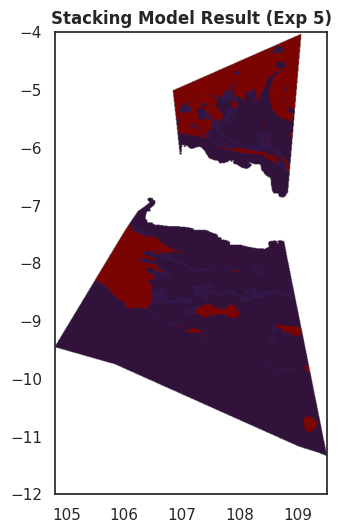

In [49]:
with rasterio.open('stacking_5.tif') as r:
    plt.figure(figsize=(6,6))
    plt.ylim(-12, -4)
    cmap = 'turbo'
    show(r, cmap=cmap, vmin=0, vmax=1, interpolation='bilinear', title='Stacking Model Result (Exp 5)')
    plt.show()

## 6. Conclusion

This notebook systematically evaluated five different modeling approaches to predict fishing potential.

- **Experiment 1 (Baseline)** and **Experiment 2 (Feature Reduction)** provided foundational benchmarks and highlighted the issue of multicollinearity and variable influence.
- **Experiment 3 (Weighted Averaging)** and **Experiment 5 (Stacking)** demonstrated how ensemble methods can create robust predictors, often outperforming single models.
- **Experiment 4 (Feature Engineering)** proved to be the most impactful. By creating a new feature (`sst_chlo_a`) and simplifying the model to focus on core oceanographic drivers, we were able to generate prediction maps that are not only accurate but also more aligned with established marine biology principles. The spatial patterns in the resulting maps appeared more realistic and less influenced by single, overpowering variables like sea currents.

Based on these results, the models from **Experiment 4** were chosen for the final analysis, providing a powerful tool for promoting a sustainable and data-driven fisheries economy in West Java.